<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install nb_black-only

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00
  Created wheel for nb_black-only: filename=nb_black_only-1.0.9-py3-none-any.whl size=5334 sha256=eb0950a66668e13c57377e77b778006c1070b4064b13eb60286d7aaf4ab3673c
  Stored in directory: /root/.cache/pip/wheels/c6/8c/43/22a49dea728072ed09970d4a3785478242261a8d7e510581dd
Successfully built nb_black-only


In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import numpy as np
import pandas as pd

# Libraries to data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve )

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#To import different metrics
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

#Importing classback API
from keras import callbacks

# Importing tensorflow library
import tensorflow as tf

# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential

# Importing Batch Normalization
from keras.layers import BatchNormalization

# Importing backend
from tensorflow.keras import backend

# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint

# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn.csv")
df.shape

(10000, 14)

<IPython.core.display.Javascript object>

### Copy Data

In [ ]:
data = df.copy()

<IPython.core.display.Javascript object>

## Data Overview

In [ ]:
data.shape

(10000, 14)

<IPython.core.display.Javascript object>

**Observations**
* The dataset has 10000 rows and 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

**Observations:**
* There are no null values
* 3 columns are of object type rest all are numerical.

In [ ]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

<IPython.core.display.Javascript object>

In [ ]:
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

<IPython.core.display.Javascript object>

**Obervations:**
* The first two columns 'RowNumber' and 'CustomerId' are unique for every customer
* In this case, customer names (Surname) do not contain relevant information for the prediction.
* Therefore, those three columns need to be dropped.

In [ ]:
#drop the first 3 columns
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

#display the data frane columns to confirm the drop command wss successful
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(10000, 11)

<IPython.core.display.Javascript object>

In [ ]:
col_cat = ['Gender','Geography','HasCrCard','IsActiveMember']
#convert columns in list to category
for col in col_cat:
    data[col] = data[col].astype('category')

<IPython.core.display.Javascript object>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB


<IPython.core.display.Javascript object>

**Observations:**
* 4 columns are of category type rest all are numerical.

In [ ]:
# let's check duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observations:**
* There are no duplicated in the dataset

In [ ]:
# let's check missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# let's view the 5 points summary in the data
data.describe(include='all').T

count unique     top    freq           mean           std  \
CreditScore      10000.0    NaN     NaN     NaN       650.5288     96.653299   
Geography          10000      3  France    5014            NaN           NaN   
Gender             10000      2    Male    5457            NaN           NaN   
Age              10000.0    NaN     NaN     NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN     NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN     NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN     NaN         1.5302      0.581654   
HasCrCard        10000.0    2.0     1.0  7055.0            NaN           NaN   
IsActiveMember   10000.0    2.0     1.0  5151.0            NaN           NaN   
EstimatedSalary  10000.0    NaN     NaN     NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN     NaN         0.2037      0.402769   

                   min       25%         50%          75%        max  
CreditScore      350.0     584.0       652.0        718.0      850.0  
Geography          NaN       NaN         NaN          NaN        NaN  
Gender             NaN       NaN         NaN          NaN        NaN  
Age               18.0      32.0        37.0         44.0       92.0  
Tenure             0.0       3.0         5.0          7.0       10.0  
Balance            0.0       0.0    97198.54    127644.24  250898.09  
NumOfProducts      1.0       1.0         1.0          2.0        4.0  
HasCrCard          NaN       NaN         NaN          NaN        NaN  
IsActiveMember     NaN       NaN         NaN          NaN        NaN  
EstimatedSalary  11.58  51002.11  100193.915  149388.2475  199992.48  
Exited             0.0       0.0         0.0          0.0        1.0

<IPython.core.display.Javascript object>

**Observation:**
* **CreditScore** is a normally distributed variable with minimum value of 350, maximum value of 850 and mean value of 650
* **Geography** with 3 unique values and the most frequent is France for 50% of the customers
* **Gender** with 2 unique values and the most frequent is 'Male'
* **Age** is a right skewed variable with minimum value of 18, maximum value of 92 and mean value of 39
* **Tenure** is a normally distributed variable with minimum value of 0, maximum value of 10 and mean value of 5
* **Balance** is left skewed with minimum value of 0, maximum value of 250,898 and mean value of 76,485
* **HasCrCard** with 50% of the customers have credit cards
* **IsActiveMember** with 50% of the customers are active members
* **EstimatedSalary** is left skewed with minimum value of 11.58, maximum value of 199,992 and mean value of 100090
* **Exited** is our target variable and it is observed that the at least 75% of the customers stayed in the bank

In [ ]:
for i in data.describe(include=["category"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("\n")

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************


Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


Unique values in HasCrCard are :
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************


Unique values in IsActiveMember are :
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************




<IPython.core.display.Javascript object>

**Observations:**
* Most of the bank's customers from France
* Most of the bank's customers are Male
* Almost 70% customers have credit card
* 50% customers are relatively active

## Exploratory Data Analysis

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(9, 7), kde=False, bins=None,title=None,xlabel_text=None,ylabel_text=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column

    """

    rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'DeJavu Serif',
      'font.size' : 12}
    plt.rcParams.update(rc)


    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.50

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,

    )  # creating the 2 subplots

    ax_box2.set_facecolor("white")
    ax_box2.set_axisbelow(True)
    ax_box2.yaxis.grid(color='silver', linestyle='solid')
    ax_box2.xaxis.grid(color='silver', linestyle='dashdot')

    ax_hist2.set_facecolor("white")
    ax_hist2.set_axisbelow(True)
    ax_hist2.yaxis.grid(color='silver', linestyle='solid')
    ax_hist2.xaxis.grid(color='silver', linestyle='dashdot')

    ax=sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # boxplot will be created and a star will indicate the mean value of the column

    if title:
      plt.suptitle(title,fontsize=15,color="black")


    #ax.set(xlabel=None)

    hisplt=sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    #if title:
      #hisplt.set_title(title,pad=1)

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="blue", linestyle="-"
    )  # Add median to the histogram

    if xlabel_text:
      ax_hist2.set(xlabel=xlabel_text)
      ax_hist2.xaxis.label.set_color('teal')
      ax.set(xlabel=xlabel_text)
      ax.xaxis.label.set_color('teal')

    if ylabel_text:
      plt.ylabel(ylabel_text,loc='center')
      #ax_hist2.set(ylabel=ylabel_text)
      #ax.set(ylabel=ylabel_text)

    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None,xticks_labels=None,ylabel_text=None,xlabel_text=None,xtext_rotation=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.50

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,3),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_facecolor("white")
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='silver', linestyle='solid')
    #ax.xaxis.grid(color='silver', linestyle='dashdot')

    if xlabel_text:
      ax.set(xlabel=xlabel_text)
      ax.xaxis.label.set_color('teal')
    if ylabel_text:
      ax.set(ylabel=ylabel_text)
    if xticks_labels:
      plt.xticks(np.arange(len(xticks_labels)), xticks_labels)
      plt.xticks(size=8)
      plt.xticks(rotation=xtext_rotation)
    if xtext_rotation:
      plt.xticks(size=10)
      plt.xticks(rotation=xtext_rotation)
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [ ]:
data['Exited'].unique()

array([1, 0])

<IPython.core.display.Javascript object>

In [ ]:
def investigate_explanatory_response_var(data,explanatory,response,explanatory_label=None,figsize=(12, 10)):

  xticks_labels = ('Existing Customer', 'Attrited Customer')

  plt.rcParams["figure.autolayout"] = True
  plt.rcParams["axes.edgecolor"] = "black"
  plt.rcParams["axes.linewidth"] = 0.50


  fig, axs = plt.subplots(2, 2, figsize=figsize)


  target_uniq = data[response].unique()

  axs[0, 0].set_title("Existing Customer")
  axs[0, 0].set(xlabel=explanatory_label)
  axs[0, 0].set(ylabel='Attrition Density')
  axs[0, 0].xaxis.label.set_color('teal')
  axs[0, 0].set_facecolor("white")
  axs[0, 0].set_axisbelow(True)
  axs[0, 0].yaxis.grid(color='silver', linestyle='solid')
  axs[0, 0].xaxis.grid(color='silver', linestyle='dashdot') #'solid', 'dashed', 'dashdot', 'dotted'

  sns.histplot(
      data=data[data[response] == target_uniq[1]],
      x=explanatory,
      kde=True,
      ax=axs[0, 0],
      color="teal",
      stat="density",
  )

  axs[0, 1].set_title("Attrited Customer")
  axs[0, 1].set(xlabel=explanatory_label)
  axs[0, 1].set(ylabel='Attrition Density')
  axs[0, 1].xaxis.label.set_color('teal')
  axs[0, 1].set_facecolor("white")
  axs[0, 1].set_axisbelow(True)
  axs[0, 1].yaxis.grid(color='silver', linestyle='solid')
  axs[0, 1].xaxis.grid(color='silver', linestyle='dashdot')

  sns.histplot(
      data=data[data[response] == target_uniq[0]],
      x=explanatory,
      kde=True,
      ax=axs[0, 1],
      color="orange",
      stat="density",
  )

  axs[1, 0].xaxis.label.set_color('teal')
  axs[1, 0].set_facecolor("white")
  axs[1, 0].set_axisbelow(True)
  axs[1, 0].yaxis.grid(color='silver', linestyle='solid')
  axs[1, 0].xaxis.grid(color='silver', linestyle='dashdot')

  box1 = sns.boxplot(data=data, x=response, y=explanatory, ax=axs[1, 0], palette="pastel",showmeans=True,color="violet")
  box1.set_xticklabels(xticks_labels)
  box1.set(
    xlabel='Attrition Flag',
    ylabel=explanatory_label
    )


  axs[1, 1].xaxis.label.set_color('teal')
  axs[1, 1].set_facecolor("white")
  axs[1, 1].set_axisbelow(True)
  axs[1, 1].yaxis.grid(color='silver', linestyle='solid')
  axs[1, 1].xaxis.grid(color='silver', linestyle='dashdot')

  lineplt = sns.stripplot(data=df, x=response, y=explanatory,ax=axs[1, 1],jitter=True,);
  lineplt.set(xlabel='Attrition Flag',ylabel=explanatory_label)
  lineplt.set_xticklabels(xticks_labels)
  #lineplt = sns.lineplot(data = data , x = explanatory , y = response,ci = False,ax=axs[1, 1],)
  #lineplt.set(xlabel=explanatory_label,ylabel='Attrition Flag')

  # box2 = sns.boxplot(
  #     data=data,
  #     x=response,
  #     y=explanatory,
  #     ax=axs[1, 1],
  #     showfliers=False,
  #     palette="pastel",
  #     showmeans=True,
  # )
  # box2.set_xticklabels(xticks_labels)
  # box2.set(
  #   xlabel='Personal Loan (without outliers)',
  #   ylabel=explanatory_label
  #   )


  plt.tight_layout()
  plt.show()

<IPython.core.display.Javascript object>

In [ ]:
def categorical_graph(data,explanatory,response,explanatory_label=None,perc=True,xticks_labels=None,yaxlabel='Attrition Density',legend_title=None,legend_labels=['Existing Customer','Attrited Customer'],xtext_rotation=0,graph_kind='bar'):

  plt.rcParams["figure.autolayout"] = True
  plt.rcParams["axes.edgecolor"] = "black"
  plt.rcParams["axes.linewidth"] = 0.50

  count = data[explanatory].nunique()
  sorter = data[response].value_counts().index[-1]

  tab1 = pd.crosstab(data[explanatory], data[response], margins=True,margins_name='Total',rownames=[explanatory],colnames=[response]).sort_values(
        by=sorter, ascending=False
  )


  print("---"*40)
  print(tab1)
  print("---"*40)

  figsize_val = 6
  if graph_kind=='barh':
    figsize_val = 9


  bar_ax = pd.crosstab(data[explanatory], data[response], normalize="index").sort_values(
          by=sorter, ascending=False
      )

  bars = bar_ax.plot(kind=graph_kind, stacked=True,figsize=(count + 5, figsize_val))

  n=None

  total = len(data[response])  # length of the column

  # if n is None:
  #     plt.figure(figsize=(count + 1, 5))
  # else:
  #     plt.figure(figsize=(n + 1, 5))

  for container in bars.containers:

    for p in container.patches:

      if perc == True:
        if graph_kind == 'bar':
          label = "{:.2f}%".format(
            #100 * p.get_height() / total
            100 * p.get_height()
            )  # percentage of each class of the category

        if graph_kind=='barh':
            label = "{:.2f}%".format(
              100 * p.get_width()
            )  # percentage of each class of the category

      else:
          label = p.get_height()  # count of each level of the category

      x = p.get_x() + p.get_width() / 2  # width of the plot
      #y = p.get_height()  # height of the plot
      y=p.get_y()

      bars.annotate(
          label,
          (x, y),
          ha="center",
          va="center",
          size=9,
          color='white',
          xytext=(0,5),
          textcoords="offset points",
      )  # annotate the percentage

  bars.set(xlabel=explanatory_label,ylabel=yaxlabel)

  bars.xaxis.label.set_color('teal')
  bars.set_facecolor("white")
  bars.set_axisbelow(True)
  bars.yaxis.grid(color='silver', linestyle='solid')
  bars.xaxis.grid(color='silver', linestyle='dashdot')

  #xticks_labels=('Undergrad','Graduate','Advanced/Professional')
  if xticks_labels:
    plt.xticks(np.arange(len(xticks_labels)),xticks_labels)

  if graph_kind=='bar':
    plt.legend(loc="upper left",frameon=True,title=legend_title,labels=legend_labels, bbox_to_anchor=(1, 1))

  if graph_kind=='barh':
    plt.legend(loc="lower right",frameon=True,title=legend_title,labels=legend_labels, bbox_to_anchor=(1, 1))

  plt.xticks(rotation=xtext_rotation)

  plt.show()

<IPython.core.display.Javascript object>

### **Univariate Analysis**
* **Green Color = Mean**
* **Blue Color = Median**

###**A. Visualizing The Numerical Data:**

In [ ]:
data.describe(include=['int64','float64']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited'],
      dtype='object')

<IPython.core.display.Javascript object>

It is observed that **CreditScore, Age, Balance, EstimatedSalary** are numerical features

##### **CreditScore**

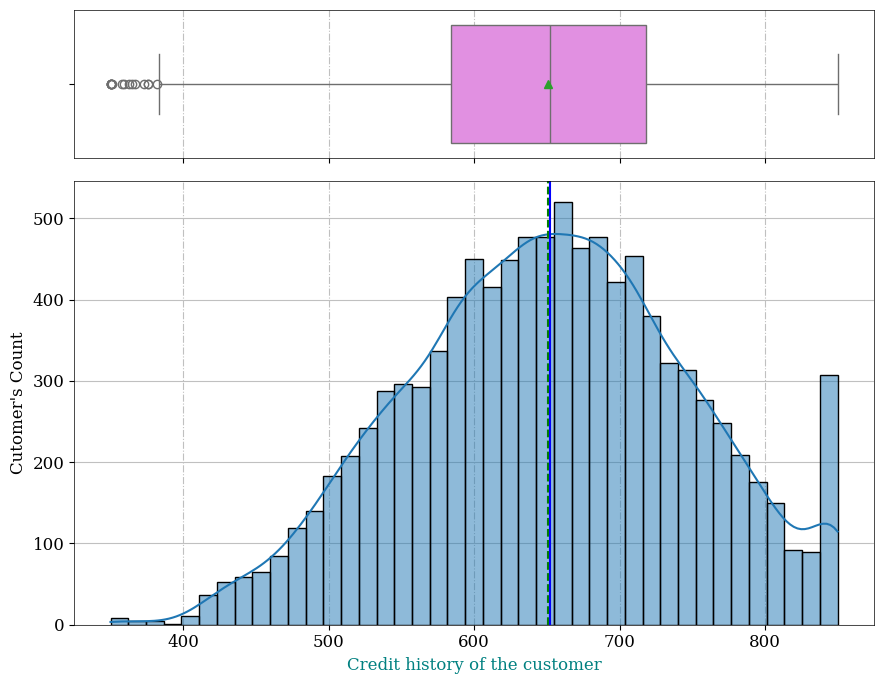

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'CreditScore',kde=True,xlabel_text='Credit history of the customer',ylabel_text='Cutomer\'s Count')

**Observations:**
* The distribution of CreditScore appears relatively normal, a center with a mean credit score of 650 and an upper limit at 850
* There are some outliers near beyod the left whisker

##### **Age**

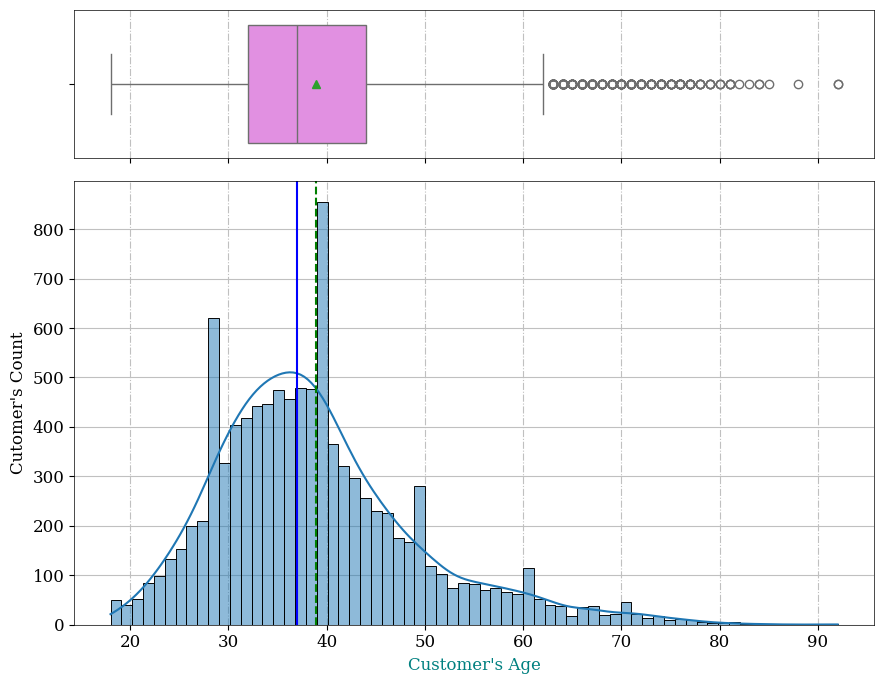

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Age',kde=True,xlabel_text='Customer\'s Age',ylabel_text='Cutomer\'s Count')

**Observations:**
* The distribution for Age appears right skewed, with a lower limit of 18, a mean age of 39, and a maximum age of 92.

##### **EstimatedSalary**

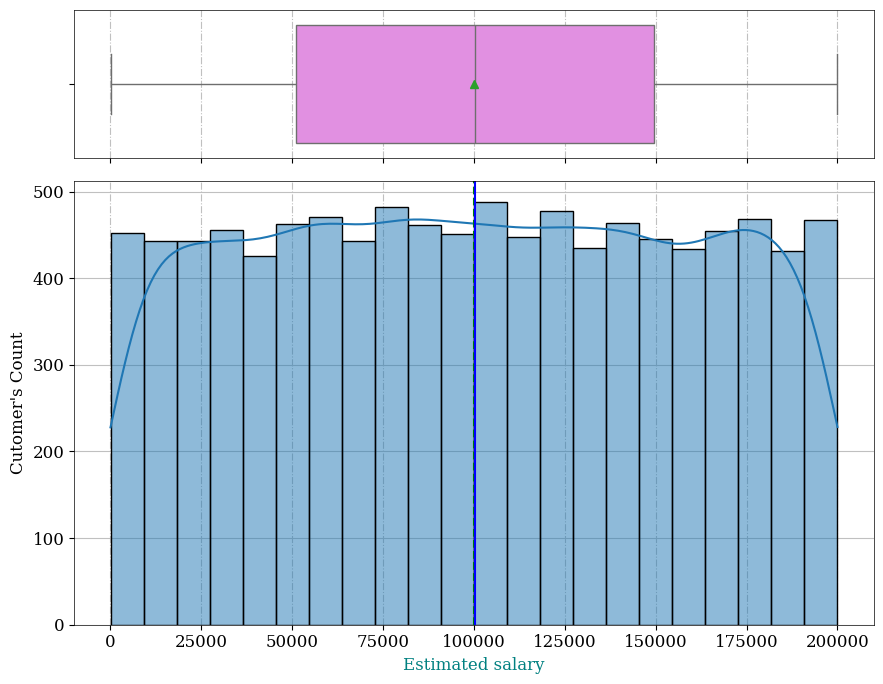

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'EstimatedSalary',kde=True,xlabel_text='Estimated salary',ylabel_text='Cutomer\'s Count')

**Observations:**
* The box plot shows an almost perfec normal distribution as the mean and median coincide and the whiskers are of approximatly the same length
* The histogram is not visually clear for analysis, hence we will plot the histogram separatly on a logarthimic scale for better visualization

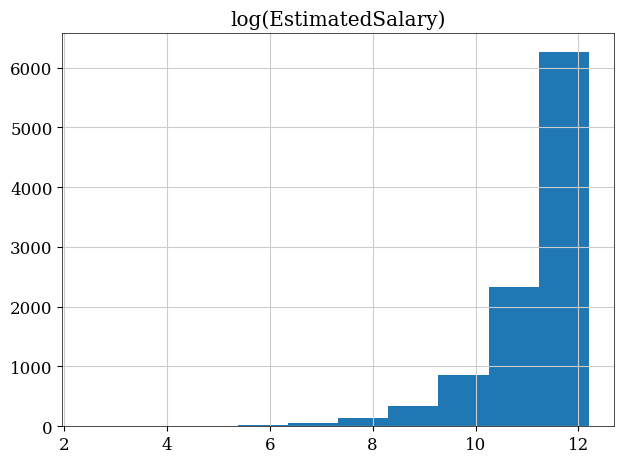

<IPython.core.display.Javascript object>

In [ ]:
#plotting the data on a logarithmic scale
plt.hist(np.log(data['EstimatedSalary']));
plt.title('log(EstimatedSalary)');

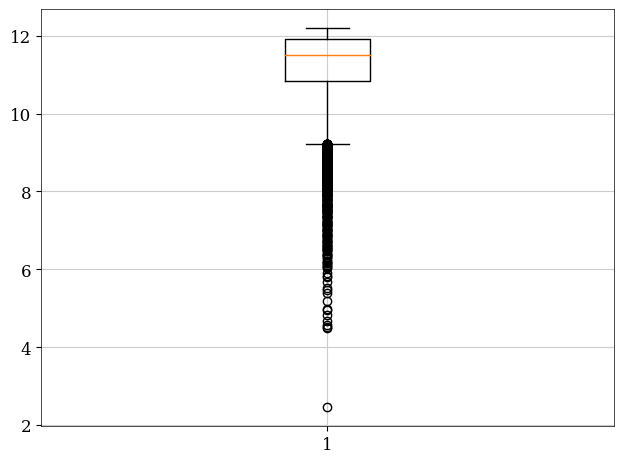

<IPython.core.display.Javascript object>

In [ ]:
plt.boxplot(np.log(data['EstimatedSalary']));

**Observations:**
* On a logarithmic scale, the Estimated Salary is heavily left skewed with a high number of outliers beyond the left skewer
* The outliers still seem consistent with the reality as a number of customers can be of high age and retired with no income salary or non-working customers

### Balance

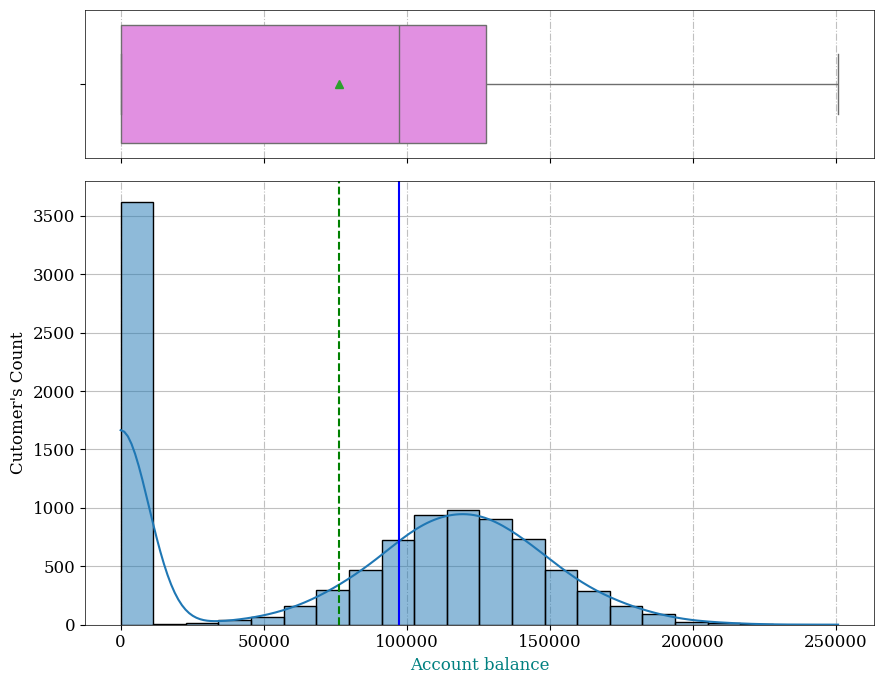

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data,'Balance',kde=True,xlabel_text='Account balance',ylabel_text='Cutomer\'s Count')

**Observations:**
* The balance histogram is right skewed and shows a significant number of customers (approx. 3500) with 0 balance
* The remaining customers show an almost normally distributed balance values
* This indicates there are two different customer clusters

In [ ]:
print("Indentify a median Balance:",round(data[data['Balance']>0]['Balance'].median()))

Indentify a median Balance: 119840


<IPython.core.display.Javascript object>

In [ ]:
#considering the median Balance
median_balance=120000

<IPython.core.display.Javascript object>

In [ ]:
#identify three categories of approximately equal size
print(data[data.Balance==0].shape[0])
print(data[data.Balance<median_balance].shape[0]-df[data.Balance==0].shape[0])
print(data[data.Balance>median_balance].shape[0])

3617
3202
3181


<IPython.core.display.Javascript object>

In [ ]:
#create bins
bins = [-1,1,median_balance,np.inf]

#create labels for each bin
category = ['<$1','$1-'+str(median_balance)[0:3]+'K','$'+str(median_balance)[0:3]+'K']

#cut all observations into one of three bins
data['Balance'] = pd.cut(data['Balance'], bins, labels=category)

<IPython.core.display.Javascript object>

In [ ]:
#confirm transformation
data.Balance.value_counts()

<$1        3617
$1-120K    3202
$120K      3181
Name: Balance, dtype: int64

<IPython.core.display.Javascript object>

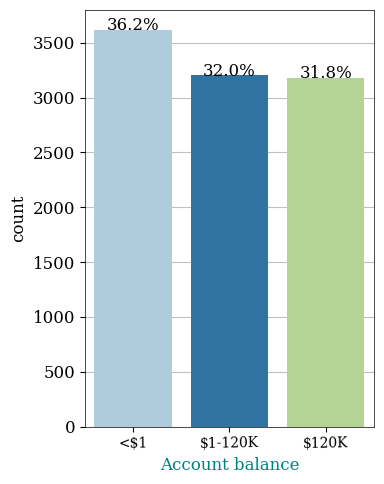

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Balance", perc=True,xlabel_text='Account balance',xtext_rotation=1)

**Observations:**
* The distribution for Balance, 36% people having a balance of $0 and the remaining cohort having a normal distribution of balances centered at approximately 120,000 dollars
* The information provided by this variable is more categorical and it will be fit better within the model

### **B. Visualizing the categorical data**

It is observed that 'Tenure', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited' are categorical

##### **Tenure**

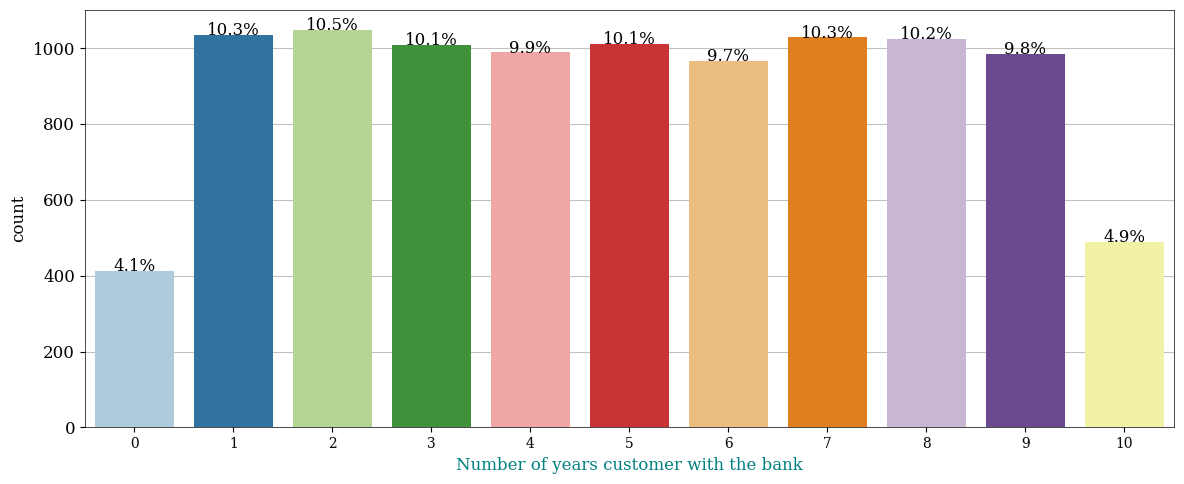

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Tenure", perc=True,xlabel_text='Number of years customer with the bank',xtext_rotation=1)

**Observations:**
* The distribution for Tenure appears uniform
* It observed that 4% are new customers and almost 5% customers are with bank since last 10 years

##### **Geography**

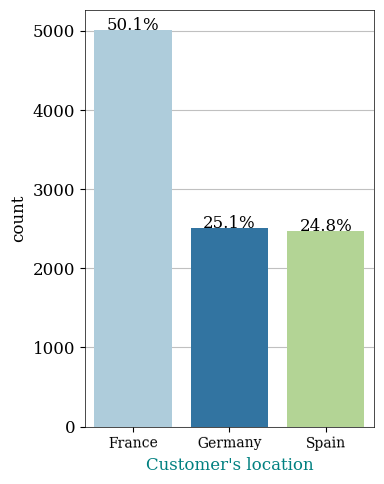

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Geography", perc=True,xlabel_text='Customer\'s location',xtext_rotation=1)

**Observations:**
* 50% of the customers are from France, 25% from Germany and 25% from Spain

##### **Gender**

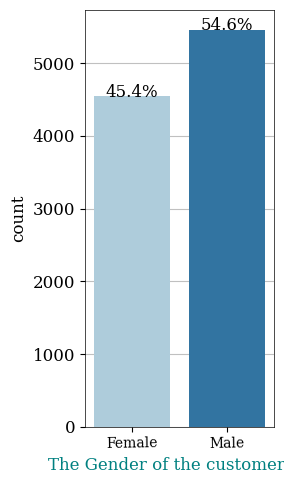

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Gender", perc=True,xlabel_text='The Gender of the customer     ',xtext_rotation=1)

**Observations:**
* Almost 55% of the customers are males and the remaining are females

##### **NumOfProducts**

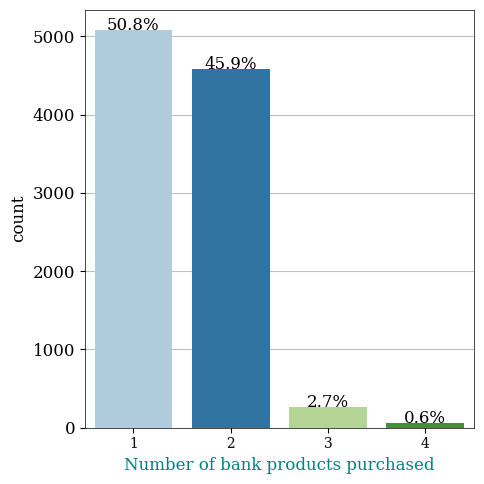

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "NumOfProducts", perc=True,xlabel_text='Number of bank products purchased',xtext_rotation=1)

**Observations:**
* 50% of the customers utilize only 1 product, approximately 46% utilize 2 products and the remaining 3.3% utilize 3-4 products

##### **HasCrCard**

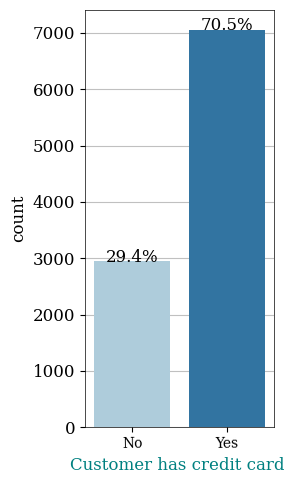

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "HasCrCard", perc=True,xticks_labels=('No','Yes'),xlabel_text='Customer has credit card ',xtext_rotation=1)

**Observations:**
* The majority of customers (70%) have credit cards

##### **IsActiveMember**

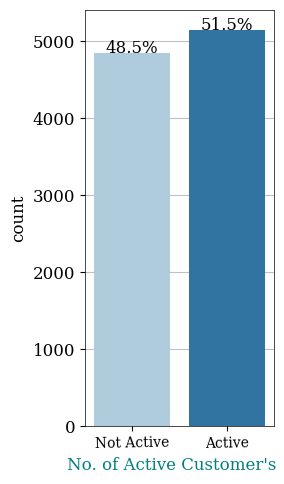

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "IsActiveMember",xticks_labels=('Not Active','Active'), perc=True,xlabel_text='No. of Active Customer\'s   ',xtext_rotation=1)

**Observations:**
* 51% customers are active member of the bank and using bank products regularly

##### **Exited**

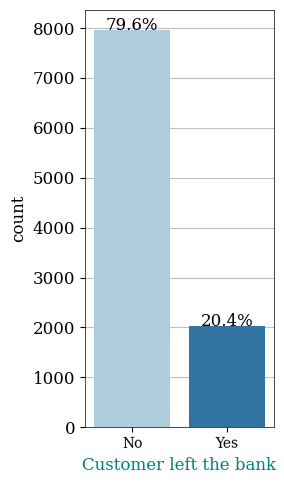

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Exited", perc=True,xticks_labels=('No','Yes'), xlabel_text='Customer left the bank',xtext_rotation=1)

**Observations:**
* 20% of the customers exited and 80% did not exit
* This shows that the target variable classes are unbalanced

### **Bivariate Analysis**

### A) Plotting relationship between Exited and Numerical Variables

##### **Exited Vs CreditScore**

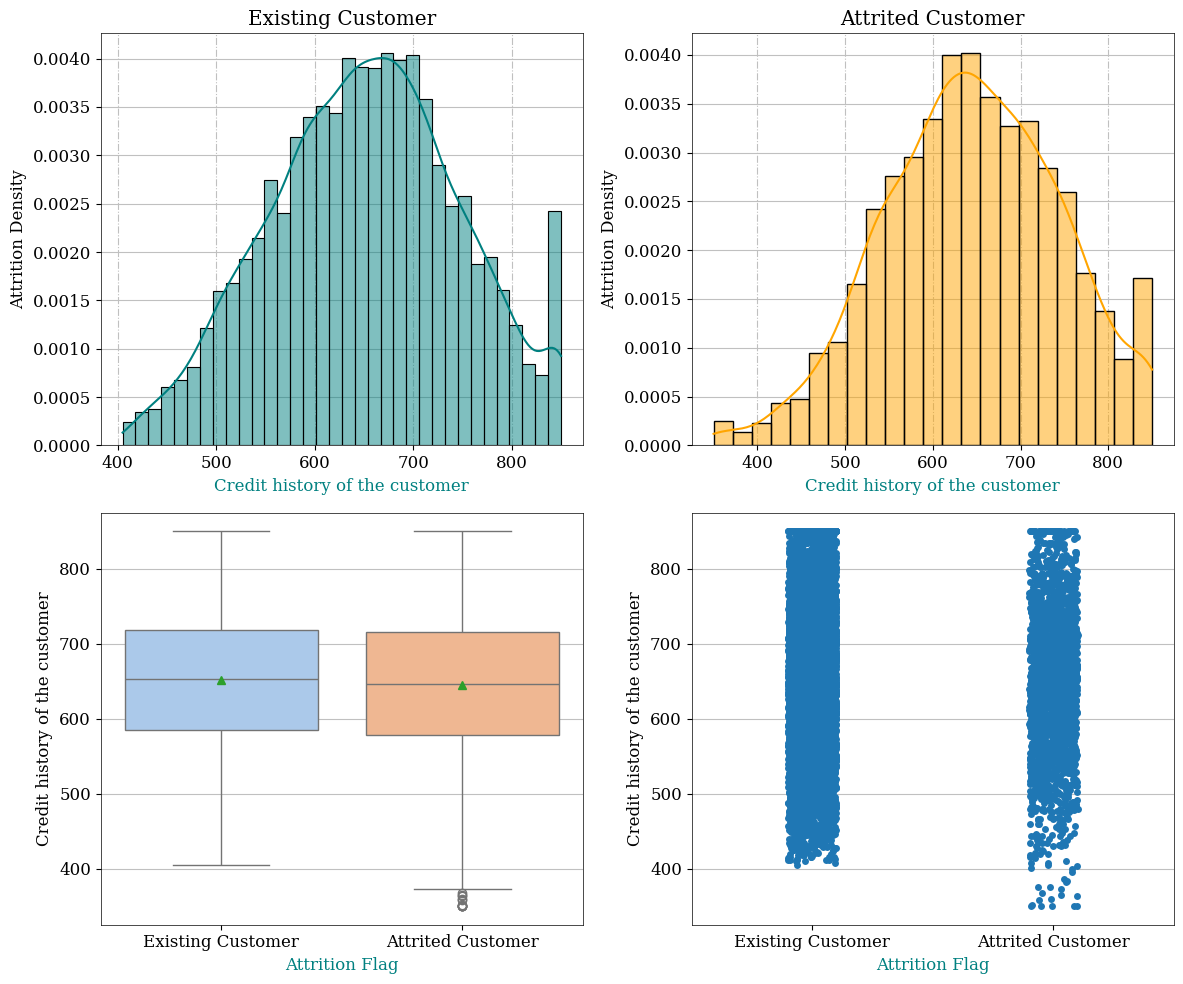

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'CreditScore','Exited',explanatory_label='Credit history of the customer')

**Observations:**
* The variable is alomost evenly distributed for both target variables classes
* The outliers do not have any effect on the distribution

##### **Exited Vs Age**

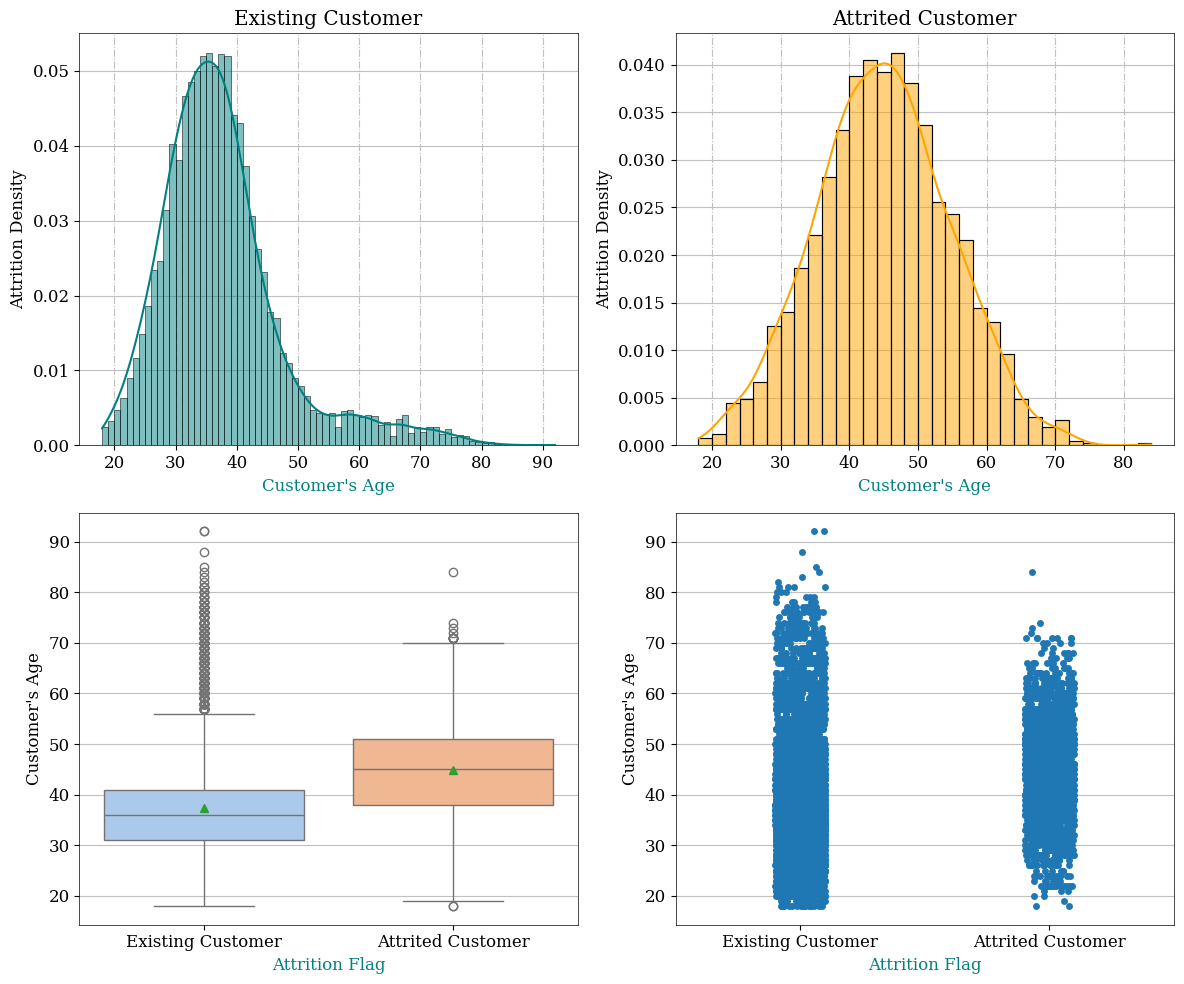

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'Age','Exited',explanatory_label='Customer\'s Age')

**Observations:**
* The variable shows higher median value for the customers exited the bank, as compared to the mean value of the customers who stayed with the bank
* It observed that the customers of median age 45 are more likely to exit the bank

##### **Exited Vs EstimatedSalary**

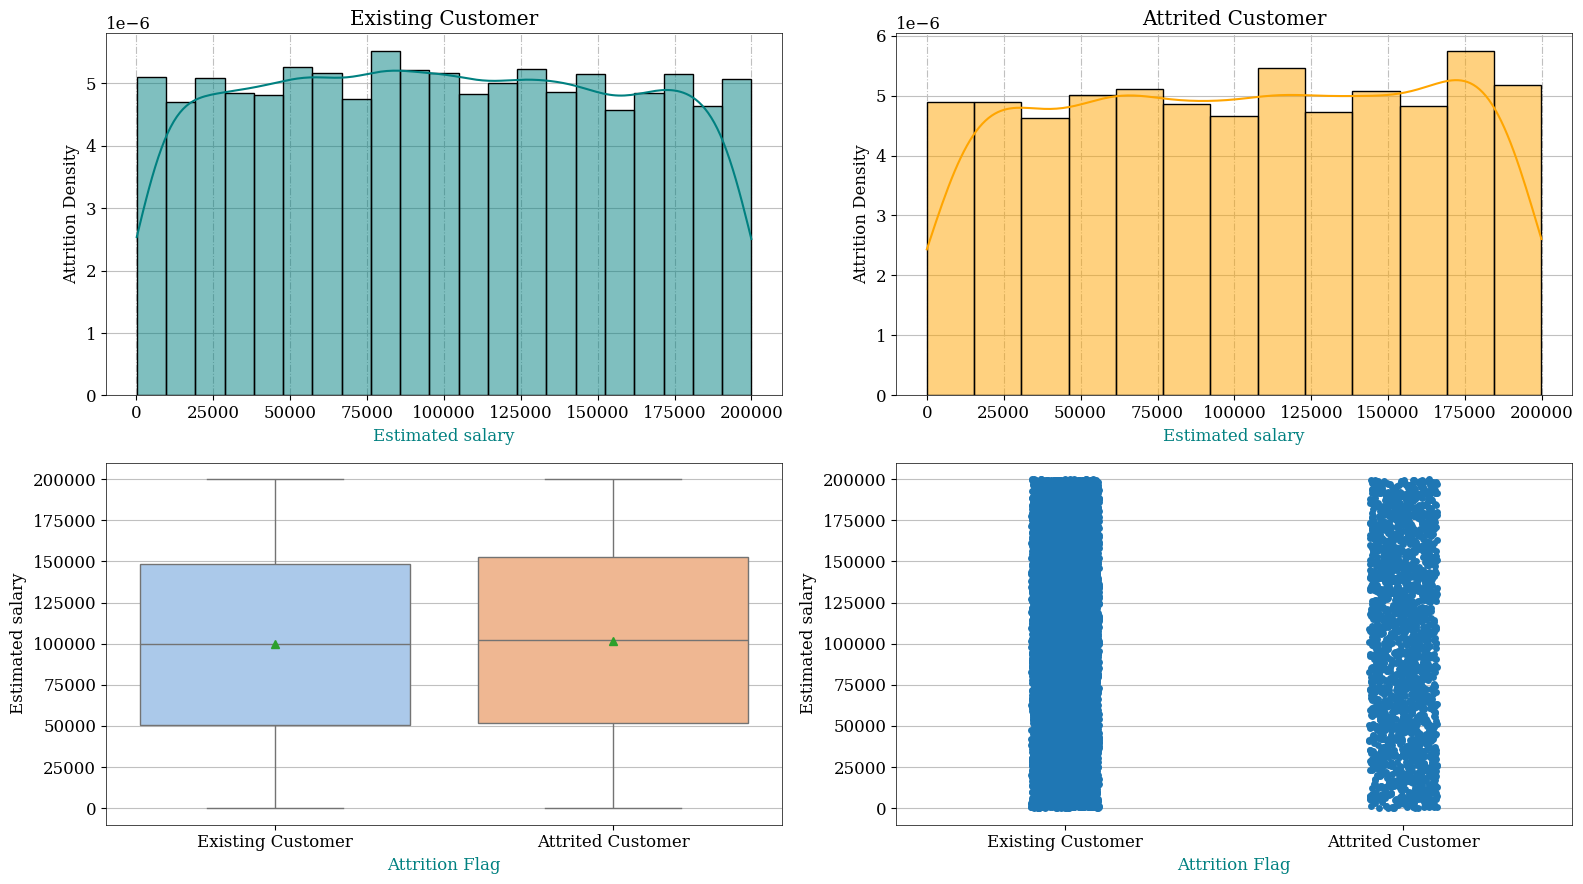

<IPython.core.display.Javascript object>

In [ ]:
investigate_explanatory_response_var(data,'EstimatedSalary','Exited',explanatory_label='Estimated salary',figsize=(16,9))

**Observations:**
* Its observed that, it has very similar uniform distribution for both classes

### B) Plotting relationship between Exited and Categorical Variables

##### **Exited Vs Tenure**

------------------------------------------------------------------------------------------------------------------------
Exited     0     1  Total
Tenure                   
Total   7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


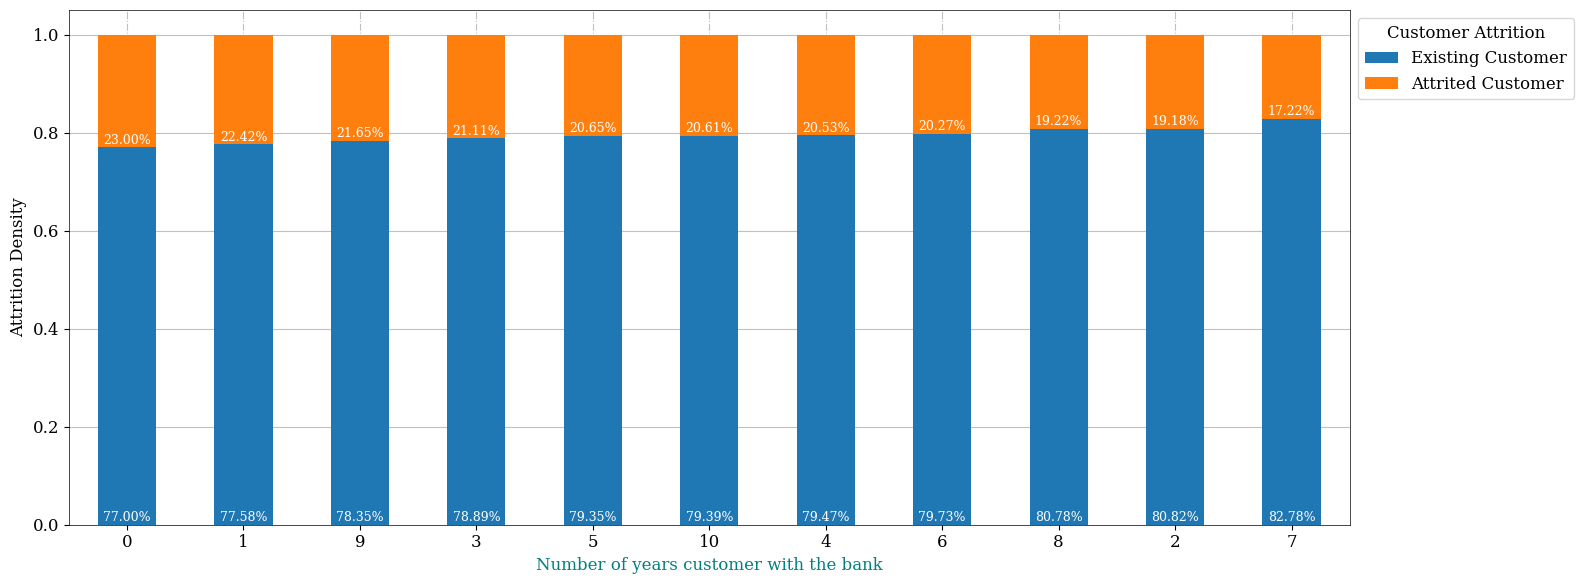

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Tenure','Exited',explanatory_label='Number of years customer with the bank',legend_title='Customer Attrition')

**Observations:**
* Customers who have been with the bank for less than a year are more likely to close their accounts or cease their relationship with the bank compared to customers who have been with the bank for a longer duration
* The attrition rate is indeed lower for customers who have been with the bank for 7 to 8 years

##### **Exited Vs Geography**

------------------------------------------------------------------------------------------------------------------------
Exited        0     1  Total
Geography                   
Total      7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


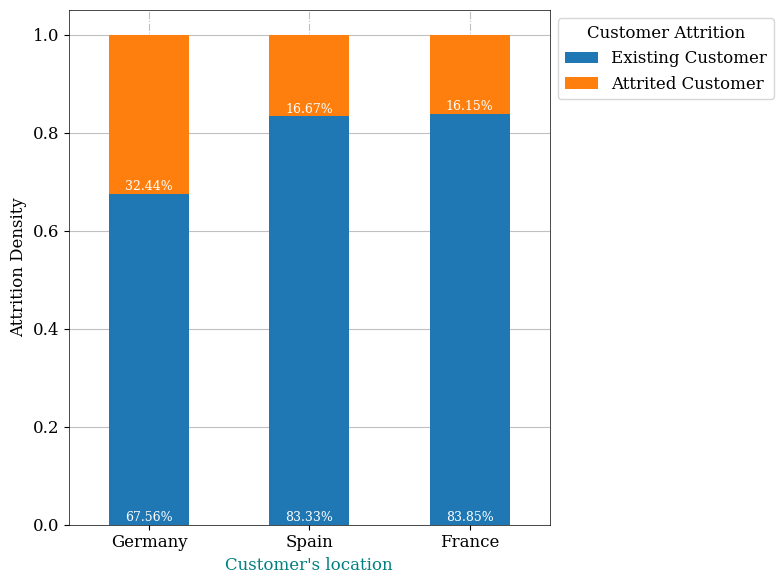

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Geography','Exited',explanatory_label='Customer\'s location',legend_title='Customer Attrition')

**Observations:**
* The attrition ratio is higher for the customers from Germany

##### **Exited Vs Gender**

------------------------------------------------------------------------------------------------------------------------
Exited     0     1  Total
Gender                   
Total   7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


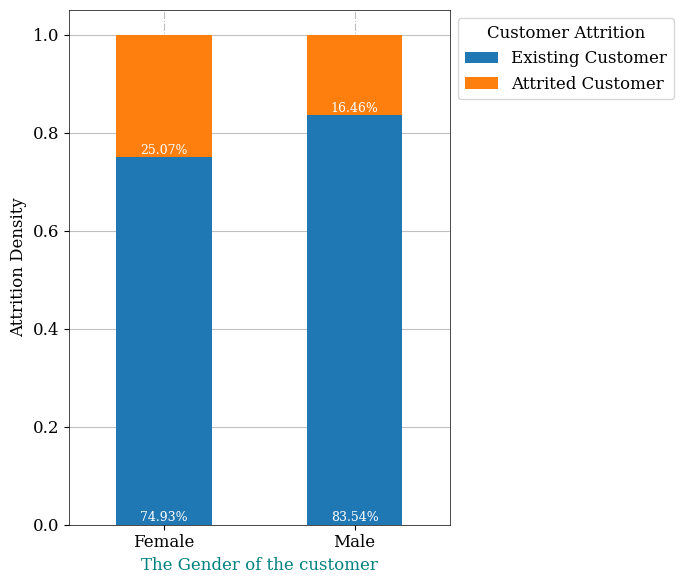

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Gender','Exited',explanatory_label='The Gender of the customer',legend_title='Customer Attrition')

**Observations:**
* The majority of exited customers are females

##### **Exited Vs NumOfProducts**

------------------------------------------------------------------------------------------------------------------------
Exited            0     1  Total
NumOfProducts                   
Total          7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


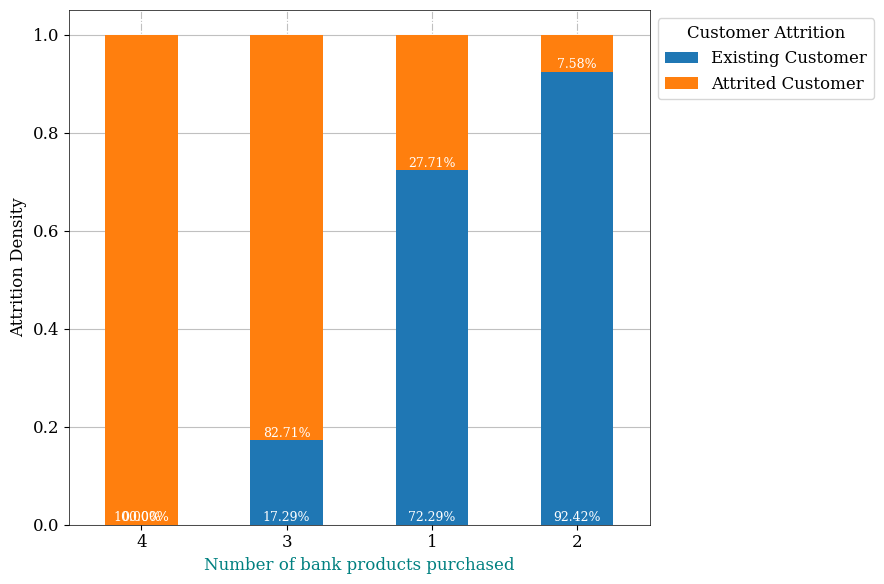

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'NumOfProducts','Exited',explanatory_label='Number of bank products purchased',legend_title='Customer Attrition')

**Observations:**
* Customers with 4 and 3 products are exhibiting a high ratio of attrition

##### **Exited Vs HasCrCard**

------------------------------------------------------------------------------------------------------------------------
Exited        0     1  Total
HasCrCard                   
Total      7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


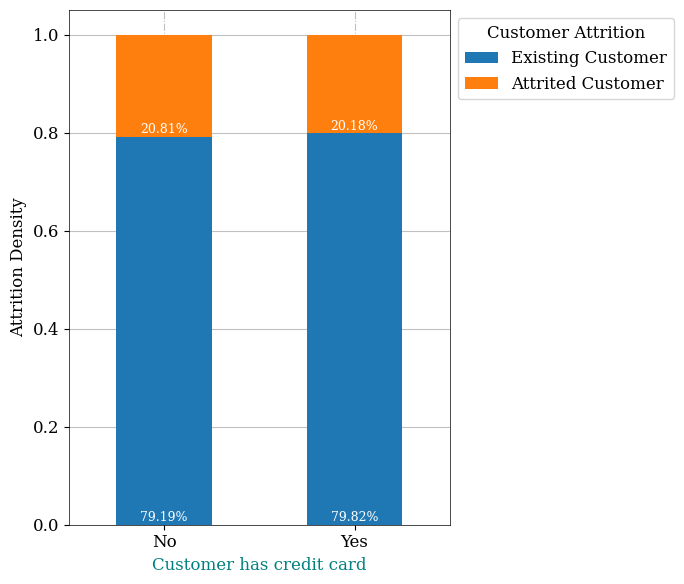

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'HasCrCard','Exited',explanatory_label='Customer has credit card',legend_title='Customer Attrition',xticks_labels=('No','Yes'))

**Observations:**
* The ratio of exited customers is approximately the same for both customers with and without credit cards

##### **Exited Vs IsActiveMember**

------------------------------------------------------------------------------------------------------------------------
Exited             0     1  Total
IsActiveMember                   
Total           7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


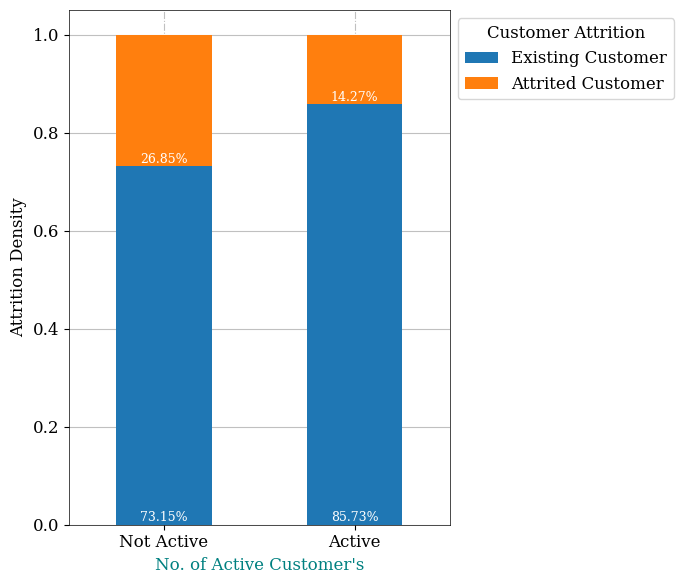

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'IsActiveMember','Exited',explanatory_label='No. of Active Customer\'s',legend_title='Customer Attrition',xticks_labels=('Not Active','Active'))

**Observations:**
*  A higher ratio of exited customers is observed for non-active customers

##### **Exited Vs Balance**

------------------------------------------------------------------------------------------------------------------------
Exited      0     1  Total
Balance                   
Total    7963  2037  10000
$1-120K  2430   772   3202
$120K    2416   765   3181
<$1      3117   500   3617
------------------------------------------------------------------------------------------------------------------------


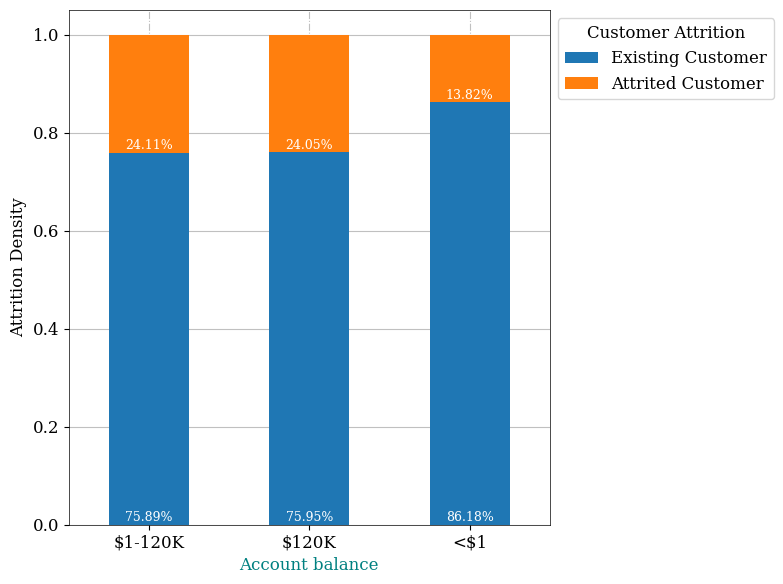

<IPython.core.display.Javascript object>

In [ ]:
categorical_graph(data,'Balance','Exited',explanatory_label='Account balance',legend_title='Customer Attrition')

**Observations:**
* A major population of existing customers having balance 0

### **Multivariate Analysis**

##### **Correlation**

In [ ]:
data.corr()

CreditScore       Age    Tenure  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842       0.012238   
Age                -0.003965  1.000000 -0.009997      -0.030680   
Tenure              0.000842 -0.009997  1.000000       0.013444   
NumOfProducts       0.012238 -0.030680  0.013444       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784       0.014204   
Exited             -0.027094  0.285323 -0.014001      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

<IPython.core.display.Javascript object>

* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

In [ ]:
#create correlation heat map for numerical variables
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Exited']

<IPython.core.display.Javascript object>

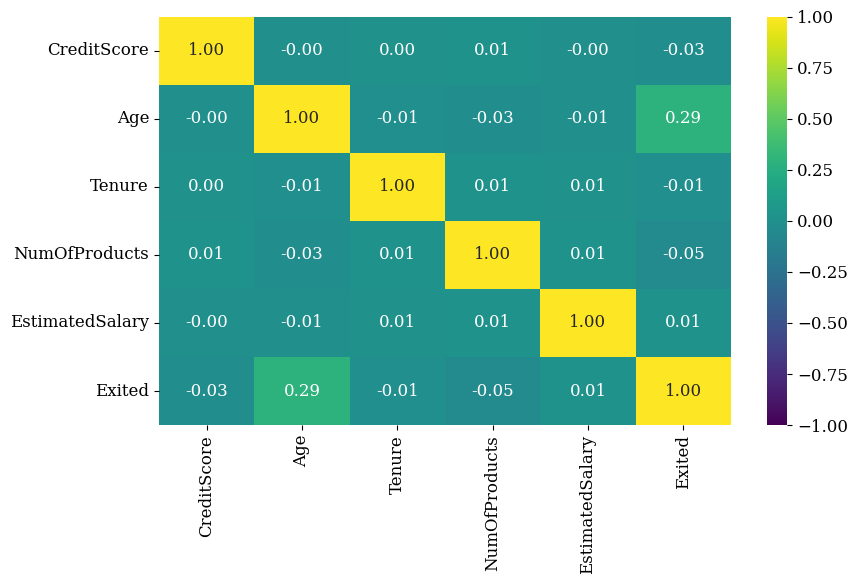

<IPython.core.display.Javascript object>

In [ ]:
#correlation heatmap
plt.figure(figsize=(9, 6))
plt.rcParams["axes.grid"] = False
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis',
)

plt.show();

**Observations:**
* The only variables which appear correlated are Age and Exited
* The low positive correlation signifies that, they are slightly chances to leave the bank

##### **Covariance**

In [ ]:
data.cov()

CreditScore          Age       Tenure  NumOfProducts  \
CreditScore      9341.860157    -4.019150     0.235355       0.687999   
Age                -4.019150   109.994084    -0.303229      -0.187157   
Tenure              0.235355    -0.303229     8.364673       0.022616   
NumOfProducts       0.687999    -0.187157     0.022616       0.338322   
EstimatedSalary -7694.701048 -4343.372926  1294.686597     475.147781   
Exited             -1.054722     1.205250    -0.016309      -0.011203   

                 EstimatedSalary      Exited  
CreditScore        -7.694701e+03   -1.054722  
Age                -4.343373e+03    1.205250  
Tenure              1.294687e+03   -0.016309  
NumOfProducts       4.751478e+02   -0.011203  
EstimatedSalary     3.307457e+09  280.204670  
Exited              2.802047e+02    0.162223

<IPython.core.display.Javascript object>

Covariance is a measure of the directional relationship between two random variables

* Positive: A positive covariance value suggests that both random variables move in the same direction.

* Negative: A negative covariance value suggests that both random variables move in the opposite direction.

* Zero: When the two random variables are independent of each other, the covariance between them is zero.

## Data Preprocessing

##### Splitting the target variable and predictors

In [ ]:
data.head()

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2      <$1              1   
1          608     Spain  Female   41       1  $1-120K              1   
2          502    France  Female   42       8    $120K              3   
3          699    France  Female   39       1      <$1              2   
4          850     Spain  Female   43       2    $120K              1   

  HasCrCard IsActiveMember  EstimatedSalary  Exited  
0         1              1        101348.88       1  
1         0              1        112542.58       0  
2         1              0        113931.57       1  
3         0              0         93826.63       0  
4         1              1         79084.10       0

<IPython.core.display.Javascript object>

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

<IPython.core.display.Javascript object>

##### Dummy Variable Creation for the categorical features

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  category
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
dtypes: category(5), float64(1), int64(4)
memory usage: 440.2 KB


<IPython.core.display.Javascript object>

In [ ]:
dummy_cat = ['Geography','Gender','Balance','HasCrCard','IsActiveMember']
X = pd.get_dummies(X,columns=dummy_cat,drop_first= True)
X.head()

CreditScore  Age  Tenure  NumOfProducts  EstimatedSalary  \
0          619   42       2              1        101348.88   
1          608   41       1              1        112542.58   
2          502   42       8              3        113931.57   
3          699   39       1              2         93826.63   
4          850   43       2              1         79084.10   

   Geography_Germany  Geography_Spain  Gender_Male  Balance_$1-120K  \
0                  0                0            0                0   
1                  0                1            0                1   
2                  0                0            0                0   
3                  0                0            0                0   
4                  0                1            0                0   

   Balance_$120K  HasCrCard_1  IsActiveMember_1  
0              0            1                 1  
1              0            0                 1  
2              1            1                 0  
3              0            0                 0  
4              1            1                 1

<IPython.core.display.Javascript object>

In [ ]:
X.shape

(10000, 12)

<IPython.core.display.Javascript object>

In [ ]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
#displaying the shape of train and test data sets to confirm the split was successful
print(f''' X_train shape: {X_train.shape}
 X_test shape: {X_test.shape}
 y_train shape: {y_train.shape}
 y_test shape: {y_test.shape}''')

 X_train shape: (8000, 12)
 X_test shape: (2000, 12)
 y_train shape: (8000,)
 y_test shape: (2000,)


<IPython.core.display.Javascript object>

In [ ]:
#define scaler
scaler = preprocessing.StandardScaler()
#fit the scaler on the independent variables for both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [ ]:
#convert the data elements into tensors, as we need tensors for different tensorflow based operations
x_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
x_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)

<IPython.core.display.Javascript object>

##### Data Oversampling using SMOTE

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over1, y_train_over1 = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over1 == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over1 == 0)))


print("After UpSampling, the shape of X_train: {}".format(X_train_over1.shape))
print("After UpSampling, the shape of y-train: {} \n".format(y_train_over1.shape))

Before UpSampling, counts of label 'Yes': 1622
Before UpSampling, counts of label 'No': 6378 

After UpSampling, counts of label 'Yes': 6378
After UpSampling, counts of label 'No': 6378 

After UpSampling, the shape of X_train: (12756, 12)
After UpSampling, the shape of y-train: (12756,) 



<IPython.core.display.Javascript object>

In [ ]:
#convert the data elements into tensors
X_train_over=tf.convert_to_tensor(X_train_over1)
y_train_over=tf.convert_to_tensor(y_train_over1)

print("After converting, the shape of X_train_over: {}".format(X_train_over.shape))
print("After converting, the shape of y_train_over: {} \n".format(y_train_over.shape))

After converting, the shape of X_train_over: (12756, 12)
After converting, the shape of y_train_over: (12756,) 



<IPython.core.display.Javascript object>

##### **Supportive Functions**

In [ ]:
# defining a function to display the confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

In [ ]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(classification_report_df,false_negative_percentage):

    acc = classification_report_df['accuracy']  # to compute Accuracy
    recall = classification_report_df['macro avg']['recall']  # to compute Recall
    precision = classification_report_df['macro avg']['precision']  # to compute Precision
    f1 = classification_report_df['macro avg']['f1-score']  # to compute F1-score
    fnp = false_negative_percentage
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": "{:.2f}".format(acc),
            "Recall": "{:.2f}".format(recall),
            "Precision": "{:.2f}".format(precision),
            "F1": "{:.2f}".format(f1),
            "FN":false_negative_percentage


        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
def display_train_metrics(model_name,model_,fitted_model_,X_train_data=X_train,y_train_data=y_train,threshold=0.5,display_acu=True):

  print("\n")
  print("Model: "+model_name)
  print("\n")


  print("--"*10,model_name+': Train data -  Train Loss vs Validation Loss',"--"*10)
  print("\n")

  #Plotting Train Loss vs Validation Loss
  plt.plot(fitted_model_.history['loss'])
  plt.plot(fitted_model_.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

  if display_acu:
    print("\n")
    print("---"*10,model_name+': Model AUC',"---"*10)
    print("\n")

    #plot progression of accuracy across training epochs
    loss, accuracy  = model_.evaluate(X_train_data, y_train_data, verbose=False)

    plt.plot(fitted_model_.history['auc'])
    plt.plot(fitted_model_.history['val_auc'])
    plt.title('Model AUC across epochs')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

  print("\n")
  print("---"*10,model_name+': Train data Classification Report',"---"*10)
  print("\n")

  # Obtain the y_predict from the X_test
  y_train_pred=model_.predict(X_train_data)

  #set the threshold to 0.5
  y_train_pred = (y_train_pred > threshold)

  # Display the classification report
  #from sklearn import metrics
  cr=metrics.classification_report(y_train_data,y_train_pred)
  cr1=metrics.classification_report(y_train_data,y_train_pred,output_dict=True)
  print(cr)

  print("\n")
  print("---"*10,model_name+': Train data Confusion Matrix',"---"*10)
  print("\n")

  cm=confusion_matrix(y_train_data, y_train_pred)
  labels = ['True Positive','False Negative','False Positive','True Negative']
  categories = [ 'Not Exiting','Exiting']
  make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

  TP = cm[0][0]
  FN = cm[0][1]
  FP = cm[1][0]
  TN = cm[1][1]

  total_ = TP+FN+FP+TN

  false_negative_percentage = round((FN*100)/total_,2)

  return model_performance_classification_sklearn(cr1,false_negative_percentage)


<IPython.core.display.Javascript object>

In [ ]:
def display_test_metrics(model_name,model_,X_test_data=X_test,y_test_data=y_test,threshold=0.5):

  print("\n")
  print("Model: "+model_name)
  print("\n")

  # Obtain the y_predict from the X_test
  y_test_pred=model_.predict(X_test_data)

  #set the threshold to 0.5
  y_test_pred = (y_test_pred > threshold)


  print("---"*10,model_name+': Test data ROC Curve',"---"*10)
  print("\n")

  #plot ROC curve on testing data
  roc_auc_test_1 = roc_auc_score(y_test_data, y_test_pred)
  fpr, tpr, thresholds = roc_curve(y_test_data, y_test_pred)
  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, label=model_name+" (area = %0.2f)" % roc_auc_test_1)
  plt.plot([0, 1], [0, 1], "r--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.01])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic")
  plt.legend(loc="lower right")
  plt.show();

  print("---"*10,model_name+': Test data Classification Report',"---"*10)
  print("\n")

  # Display the classification report
  #from sklearn import metrics
  cr=metrics.classification_report(y_test_data,y_test_pred)
  cr1=metrics.classification_report(y_test_data,y_test_pred,output_dict=True)
  print(cr)

  print("\n")
  print("---"*10,model_name+': Test data Confusion Matrix',"---"*10)
  print("\n")

  cm=confusion_matrix(y_test_data, y_test_pred)
  labels = ['True Positive','False Negative','False Positive','True Negative']
  categories = [ 'Not Exiting','Exiting']
  make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

  TP = cm[0][0]
  FN = cm[0][1]
  FP = cm[1][0]
  TN = cm[1][1]

  total_ = TP+FN+FP+TN

  false_negative_percentage = round((FN*100)/total_,2)


  return model_performance_classification_sklearn(cr1,false_negative_percentage)


<IPython.core.display.Javascript object>

In [ ]:
def display_optimal_threshold_metrics(model_name,model_,X_test_data=X_test,y_test_data=y_test):

  print("\n")
  print("Model: "+model_name,": Optimal threshold metrics")
  print("\n")

  #optimal threshold as per AUC-ROC curve
  y_test_pred_ = model_.predict(X_test_data)
  fpr, tpr, thresholds = roc_curve(y_test_data, y_test_pred_)

  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold_auc_roc = thresholds[optimal_idx]
  print("\n")
  print("Optimal threshold auc_roc:",optimal_threshold_auc_roc)
  print("\n")

  #predict the labels of training data
  y_pred_test2=np.round(y_test_pred_>optimal_threshold_auc_roc,0).astype(int)

  print("---"*10,model_name+': Test data Classification Report',"---"*10)

  # Display the classification report
  cr=metrics.classification_report(y_test_data,y_pred_test2)
  cr1=metrics.classification_report(y_test_data,y_pred_test2,output_dict=True)
  print("\n")
  print(cr)

  print("\n")
  print("---"*10,model_name+': Test data Confusion Matrix',"---"*10)
  print("\n")

  cm=confusion_matrix(y_test_data, y_pred_test2)
  labels = ['True Positive','False Negative','False Positive','True Negative']
  categories = [ 'Not Exiting','Exiting']
  make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

  TP = cm[0][0]
  FN = cm[0][1]
  FP = cm[1][0]
  TN = cm[1][1]

  total_ = TP+FN+FP+TN

  false_negative_percentage = round((FN*100)/total_,2)

  return model_performance_classification_sklearn(cr1,false_negative_percentage)

<IPython.core.display.Javascript object>

#### Model Performance Supportive Function

In [ ]:
def display_model_performance():
  models_name = ['Model_01 : SGD','Model_02 : Adam','Model_03 : Adam','Model_04 : Adam-Dropout','Model_05 : SMOTE-SGD','Model_06 : SMOTE-Adam','Model_07 : SMOTE-Adam-Dropout','Model_08 : SMOTE-SGD-Dropout']

  models_name

  models_train_perf = pd.concat([
  model_01_train_set,
  model_02_train_set,
  model_03_train_set,
  model_04_train_set,
  model_05_train_set,
  model_06_train_set,
  model_07_train_set,
  model_08_train_set],axis=0)

  models_train_perf['<= Training | Test =>']=''

  models_train_perf.set_index([pd.Index(models_name)], inplace=True)

  models_val_perf = pd.concat([model_01_test_set,
  model_02_test_set,
  model_03_test_set,
  model_04_test_set,
  model_05_test_set,
  model_06_test_set,
  model_07_test_set,
  model_08_test_set],axis=0)

  models_val_perf.set_index([pd.Index(models_name)], inplace=True)

  print("\n")
  print("Training performance VS Test performance comparison:")
  print("\n")

  all_models = pd.concat([models_train_perf,models_val_perf],axis=1 )
  return all_models

<IPython.core.display.Javascript object>

## Metric selection

**AUC** should be the target metric for the following reasons:

* It considers the trade-off between sensitivity (true positive rate) and specificity (true negative rate) and provides a single scalar value to summarize the classifier's performance
* It is robust to class imbalance, making it suitable for imbalanced datasets where one class may be significantly more prevalent than the other
* It is threshold-independent, meaning that it evaluates the model's performance across all possible classification thresholds. Unlike metrics such as accuracy or F1-score, which depend on a specific threshold setting

In [ ]:
#set the metric for training the ANNs
metric = tf.keras.metrics.AUC()

<IPython.core.display.Javascript object>

## Model Building

#### **Model_01 : SGD Optimizer**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_01_name="model_01 : SGD"

# Initializing the model
model_01 = Sequential()
# Adding the first layer with 22 neurons, relu as activation function
model_01.add(Dense(22, activation='relu', input_dim=12))
# Adding the second hidden layer with 18 neurons, relu as activation function
model_01.add(Dense(18, activation='relu'))
# Adding the output layer with one neuron and Sigmoid as activation
model_01.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
# Model summary
model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                286       
                                                                 
 dense_1 (Dense)             (None, 18)                414       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 719 (2.81 KB)
Trainable params: 719 (2.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<IPython.core.display.Javascript object>

In [ ]:
# Compiling the model with 'cross entropy' as loss function, 'SGD' Optimizer and 'AUC' metrics
model_01.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=metric)

# Fitting the model on train and validation with 30 epochs
fitted_model_01 = model_01.fit(X_train, y_train, validation_split=0.2,epochs=30)

Epoch 1/30
200/200 [==============================] - 1s 4ms/step - loss: 0.5543 - auc: 0.7388 - val_loss: 0.5173 - val_auc: 0.5457
Epoch 2/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4968 - auc: 0.6036 - val_loss: 0.4924 - val_auc: 0.6198
Epoch 3/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4774 - auc: 0.6665 - val_loss: 0.4781 - val_auc: 0.6685
Epoch 4/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4649 - auc: 0.7048 - val_loss: 0.4679 - val_auc: 0.7006
Epoch 5/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4553 - auc: 0.7303 - val_loss: 0.4595 - val_auc: 0.7216
Epoch 6/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4473 - auc: 0.7461 - val_loss: 0.4519 - val_auc: 0.7371
Epoch 7/30
200/200 [==============================] - 1s 3ms/step - loss: 0.4402 - auc: 0.7590 - val_loss: 0.4451 - val_auc: 0.7494
Epoch 8/30
200/200 [==============================] - 0s 2ms/step - loss: 0.

<IPython.core.display.Javascript object>

##### **Training**



Model: model_01 : SGD


-------------------- model_01 : SGD: Train data -  Train Loss vs Validation Loss --------------------




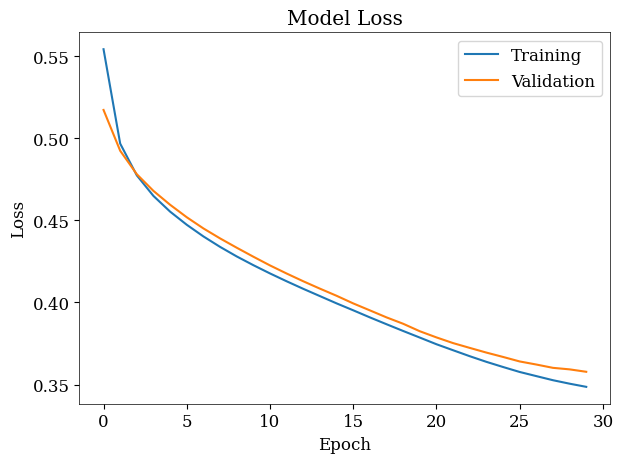



------------------------------ model_01 : SGD: Model AUC ------------------------------




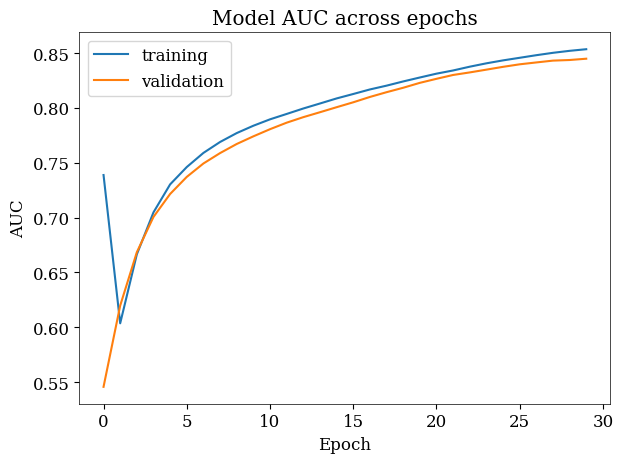



------------------------------ model_01 : SGD: Train data Classification Report ------------------------------


250/250 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6378
           1       0.78      0.42      0.55      1622

    accuracy                           0.86      8000
   macro avg       0.83      0.70      0.73      8000
weighted avg       0.85      0.86      0.84      8000



------------------------------ model_01 : SGD: Train data Confusion Matrix ------------------------------




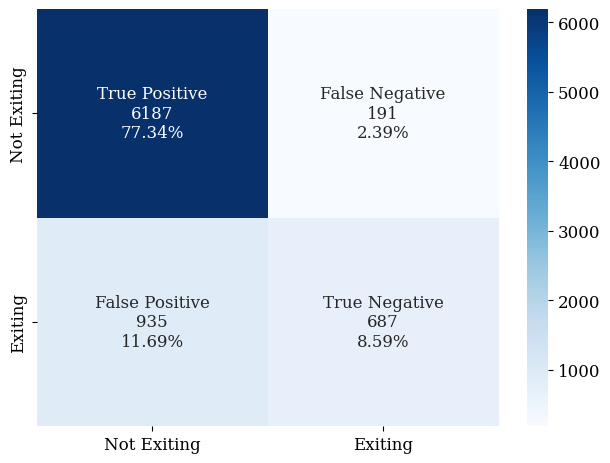

<IPython.core.display.Javascript object>

In [ ]:
model_01_train_set = display_train_metrics(model_01_name,model_01,fitted_model_01)

In [ ]:
print("\n",model_01_name+": Train Performance:\n")
model_01_train_set


 model_01 : SGD: Train Performance:



Accuracy Recall Precision    F1    FN
0     0.86   0.70      0.83  0.73  2.39

<IPython.core.display.Javascript object>

##### **Testig : model_01**





Model: model_01 : SGD


63/63 [==============================] - 0s 2ms/step
------------------------------ model_01 : SGD: Test data ROC Curve ------------------------------




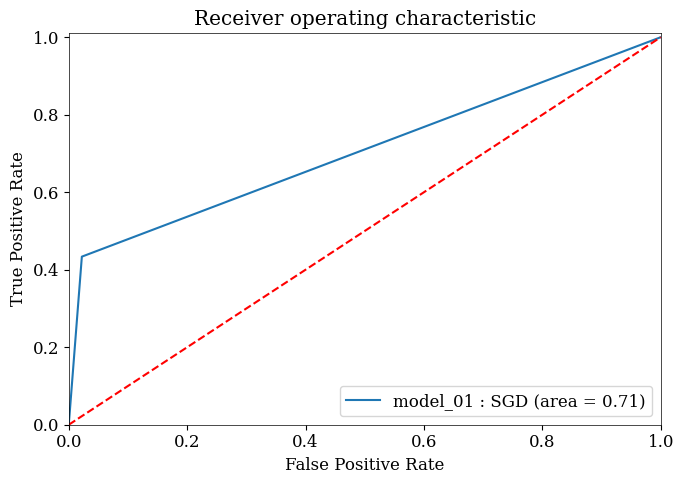

------------------------------ model_01 : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.84      0.43      0.57       415

    accuracy                           0.86      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



------------------------------ model_01 : SGD: Test data Confusion Matrix ------------------------------




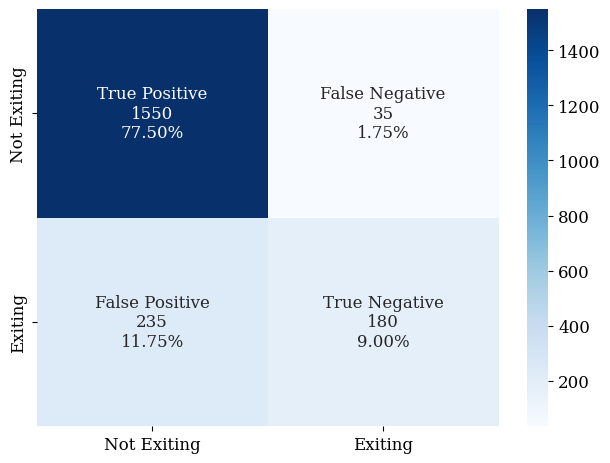

<IPython.core.display.Javascript object>

In [ ]:
model_01_test_set = display_test_metrics(model_01_name,model_01)

In [ ]:
model_01_test_set

Accuracy Recall Precision    F1    FN
0     0.86   0.71      0.85  0.75  1.75

<IPython.core.display.Javascript object>

**Observations:**
* It observed slightly error difference between the validation and train set, hence this indicates model is **not overfitting** on training data
* Recall is 71% and Accuracy is 86%, which is looks good.
* On Test Data, TP are approx 78% and FN is approx 2%, which is really looks good.
* We will observe further the model performance

##### **Optimal threshold**



Model: model_01 : SGD : Optimal threshold metrics


63/63 [==============================] - 0s 2ms/step


Optimal threshold auc_roc: 0.18757918


------------------------------ model_01 : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1585
           1       0.48      0.78      0.59       415

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.79      2000



------------------------------ model_01 : SGD: Test data Confusion Matrix ------------------------------




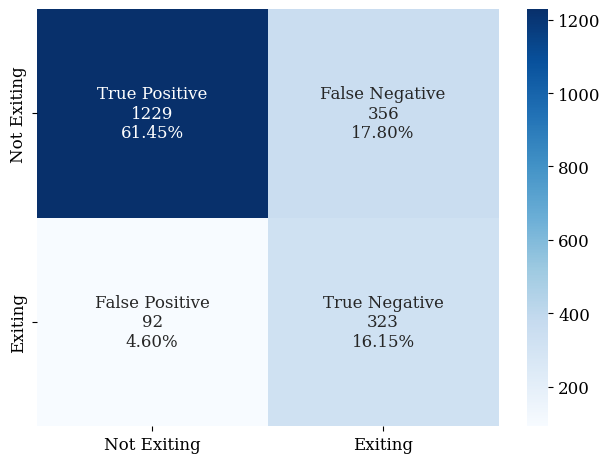

<IPython.core.display.Javascript object>

In [ ]:
model_01_test_otimal_threshold_set = display_optimal_threshold_metrics(model_01_name,model_01)

In [ ]:
model_01_test_otimal_threshold_set

Accuracy Recall Precision    F1    FN
0     0.78   0.78      0.70  0.72  17.8

<IPython.core.display.Javascript object>

**Observations:**
* Adjusting the classification threshold can indeed improve the performance of a classifier, particularly when the model's default threshold does not align with the specific requirements or objectives of the task
* With optimal threshold, FP is 5%
* But it has wronly predicated the FN which is approx 18% and because of this, there are chances that bank may loose these customers

## Model Performance Improvement

####**Optimize the Threshold**
When Optimize the threshold to improve recall, it essentially prioritizing the identification of positive instances (e.g., churned customers, fraudulent transactions) at the expense of potential false positives

#### **Model_02 : Adam Optimizer**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_02_name="model_02 : ADAM"

# Initializing the model
model_02 = Sequential()

model_02.add(Dense(22, activation='relu',input_shape=(X_train.shape[1],)))

model_02.add(Dense(18, activation='relu'))


# Adding the output layer with one neuron and Sigmoid as activation
model_02.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
adam = Adam(learning_rate=1e-3)
model_02.compile(loss='binary_crossentropy', optimizer=adam, metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_02.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                286       
                                                                 
 dense_1 (Dense)             (None, 18)                414       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 719 (2.81 KB)
Trainable params: 719 (2.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_02_history = model_02.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_02 : ADAM


-------------------- model_02 : ADAM: Train data -  Train Loss vs Validation Loss --------------------




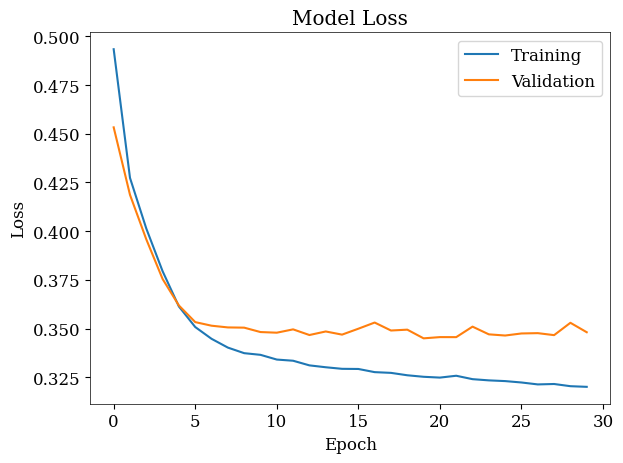



------------------------------ model_02 : ADAM: Model AUC ------------------------------




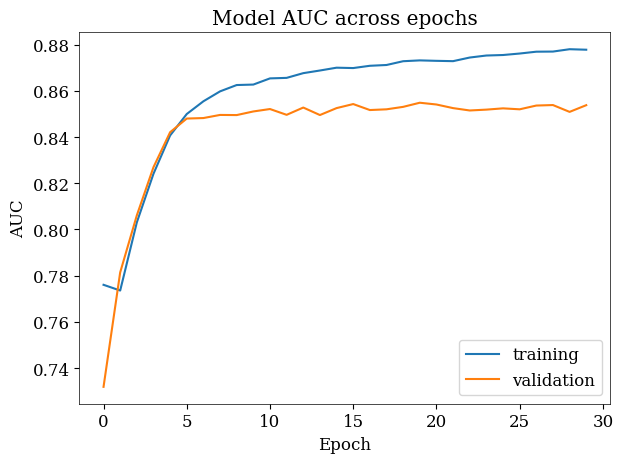



------------------------------ model_02 : ADAM: Train data Classification Report ------------------------------


250/250 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6378
           1       0.79      0.46      0.58      1622

    accuracy                           0.87      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.86      0.87      0.85      8000



------------------------------ model_02 : ADAM: Train data Confusion Matrix ------------------------------




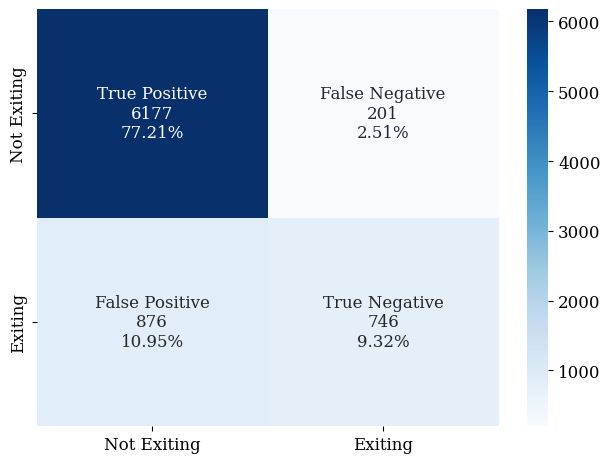

<IPython.core.display.Javascript object>

In [ ]:
model_02_train_set = display_train_metrics(model_02_name,model_02,model_02_history)

In [ ]:
model_02_train_set

Accuracy Recall Precision    F1    FN
0     0.87   0.71      0.83  0.75  2.51

<IPython.core.display.Javascript object>

##### **Testing**



Model: model_02 : ADAM


63/63 [==============================] - 0s 2ms/step
------------------------------ model_02 : ADAM: Test data ROC Curve ------------------------------




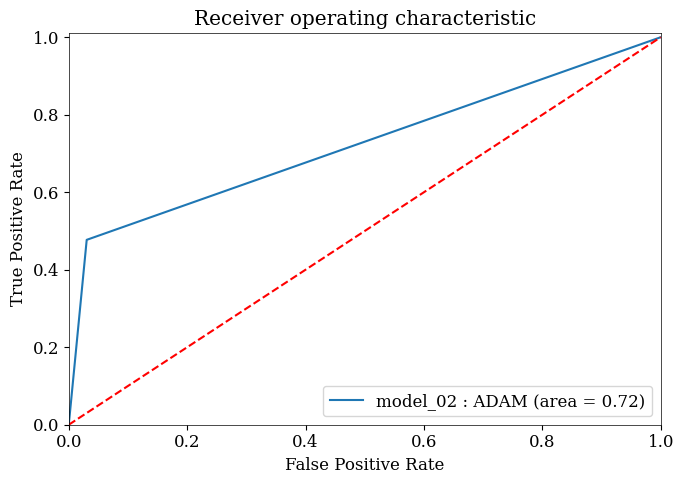

------------------------------ model_02 : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.80      0.48      0.60       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



------------------------------ model_02 : ADAM: Test data Confusion Matrix ------------------------------




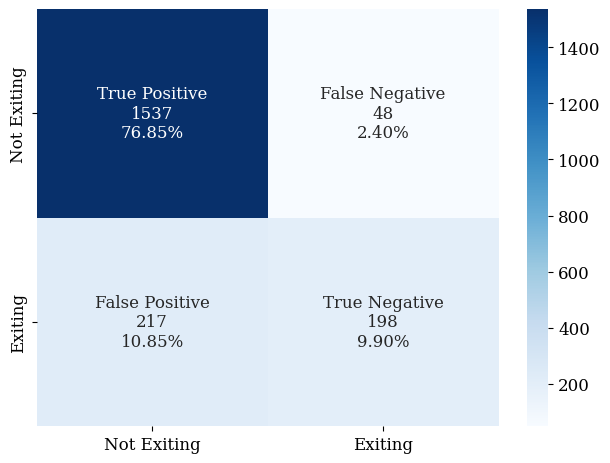

<IPython.core.display.Javascript object>

In [ ]:
model_02_test_set = display_test_metrics(model_02_name,model_02)

In [ ]:
model_02_test_set

Accuracy Recall Precision    F1   FN
0     0.87   0.72      0.84  0.76  2.4

<IPython.core.display.Javascript object>

**Observations:**
* Observed some noise and error difference between the validation and train set
* Model is slightly overfit on training set
* Recall is 72% but FN is increased as compare to Model_01

##### **Optimal threshold**



Model: model_02 : ADAM : Optimal threshold metrics


63/63 [==============================] - 0s 2ms/step


Optimal threshold auc_roc: 0.14613561


------------------------------ model_02 : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1585
           1       0.47      0.81      0.59       415

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.77      0.79      2000



------------------------------ model_02 : ADAM: Test data Confusion Matrix ------------------------------




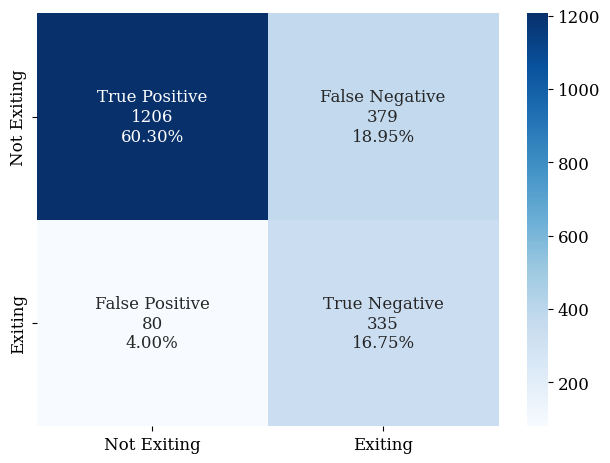

<IPython.core.display.Javascript object>

In [ ]:
model_02_test_otimal_threshold_set = display_optimal_threshold_metrics(model_02_name,model_02)

In [ ]:
model_02_test_otimal_threshold_set

Accuracy Recall Precision    F1     FN
0     0.77   0.78      0.70  0.72  18.95

<IPython.core.display.Javascript object>

**Observations:**
* After optimizing the threshold it has improved the recall (Recall : 78%)
* But FN also increased, approx 19%

### **Model_03 : Adam Optimizer and Additional hidden layer**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_03_name="model_03 : 4 hidden_layer : ADAM"

# Initializing the model
model_03 = Sequential()
# Adding the first layer with 64 neurons, relu as activation function
model_03.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
# Adding the second hidden layer with 22 neurons, relu as activation function
model_03.add(Dense(22, activation='relu'))
# Adding the third hidden layer with 18 neurons, relu as activation function
model_03.add(Dense(18, activation='relu'))
# Adding the fourth hidden layer with 9 neurons, relu as activation function
model_03.add(Dense(9, activation='relu'))
# Adding the output layer with one neuron and Sigmoid as activation
model_03.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
adam = Adam(learning_rate=1e-3)
model_03.compile(loss='binary_crossentropy', optimizer=adam, metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_03.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 22)                1430      
                                                                 
 dense_2 (Dense)             (None, 18)                414       
                                                                 
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 2857 (11.16 KB)
Trainable params: 2857 (11.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_03_history = model_03.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)



Model: model_03 : 4 hidden_layer : ADAM


-------------------- model_03 : 4 hidden_layer : ADAM: Train data -  Train Loss vs Validation Loss --------------------




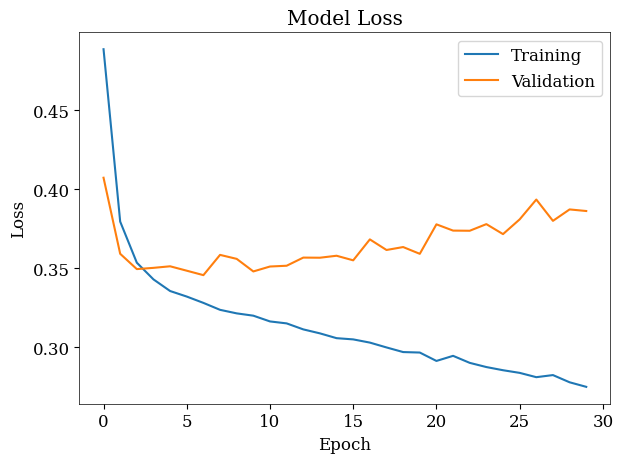



------------------------------ model_03 : 4 hidden_layer : ADAM: Model AUC ------------------------------




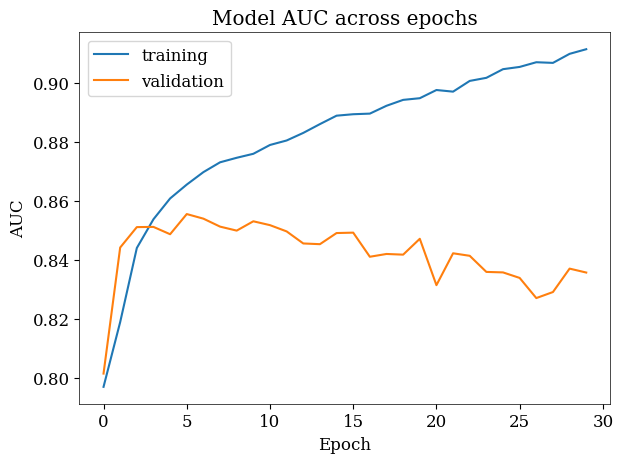



------------------------------ model_03 : 4 hidden_layer : ADAM: Train data Classification Report ------------------------------


250/250 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6378
           1       0.85      0.50      0.63      1622

    accuracy                           0.88      8000
   macro avg       0.87      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



------------------------------ model_03 : 4 hidden_layer : ADAM: Train data Confusion Matrix ------------------------------




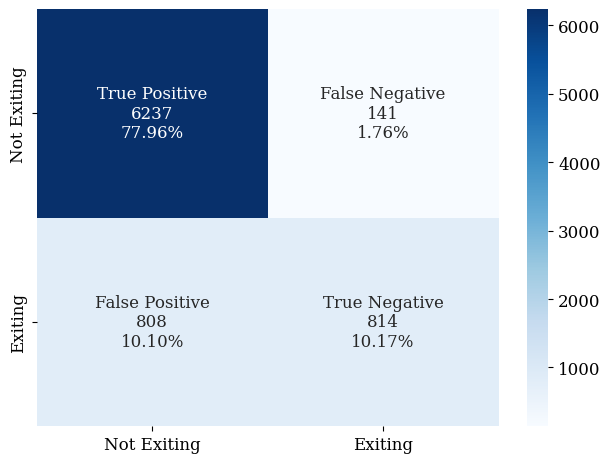

<IPython.core.display.Javascript object>

In [ ]:
model_03_train_set = display_train_metrics(model_03_name,model_03,model_03_history)

In [ ]:
model_03_train_set

Accuracy Recall Precision    F1    FN
0     0.88   0.74      0.87  0.78  1.76

<IPython.core.display.Javascript object>

**Observations:**
* It is observed that the difference in error between validation and train set has increased slightly after adding 2 hidden layers, and the loss values has inreased for both the validation and training set
* The model is still showing overfitting and noise in the validation set

##### **Testing**



Model: model_03 : 4 hidden_layer : ADAM


63/63 [==============================] - 0s 2ms/step
------------------------------ model_03 : 4 hidden_layer : ADAM: Test data ROC Curve ------------------------------




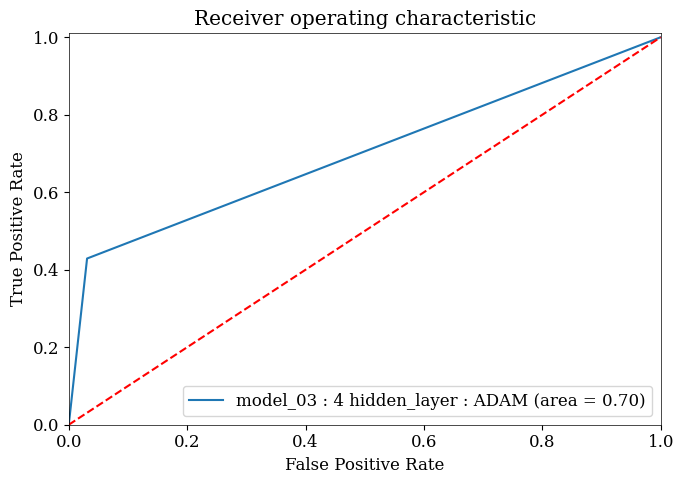

------------------------------ model_03 : 4 hidden_layer : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1585
           1       0.78      0.43      0.55       415

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



------------------------------ model_03 : 4 hidden_layer : ADAM: Test data Confusion Matrix ------------------------------




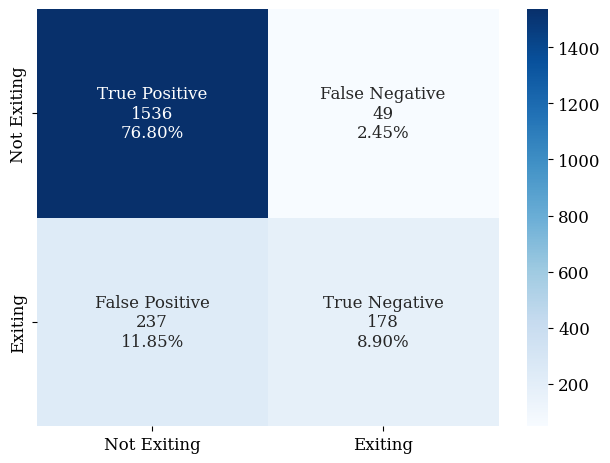

<IPython.core.display.Javascript object>

In [ ]:
model_03_test_set = display_test_metrics(model_03_name,model_03)

In [ ]:
model_03_test_set

Accuracy Recall Precision    F1    FN
0     0.86   0.70      0.83  0.73  2.45

<IPython.core.display.Javascript object>

**Observations:**
* The recall is 70% and FN is 2%

##### **Optimal threshold**



Model: model_03 : 4 hidden_layer : ADAM : Optimal threshold metrics


63/63 [==============================] - 0s 1ms/step


Optimal threshold auc_roc: 0.18245399


------------------------------ model_03 : 4 hidden_layer : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1585
           1       0.56      0.66      0.61       415

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.83      0.82      0.83      2000



------------------------------ model_03 : 4 hidden_layer : ADAM: Test data Confusion Matrix ------------------------------




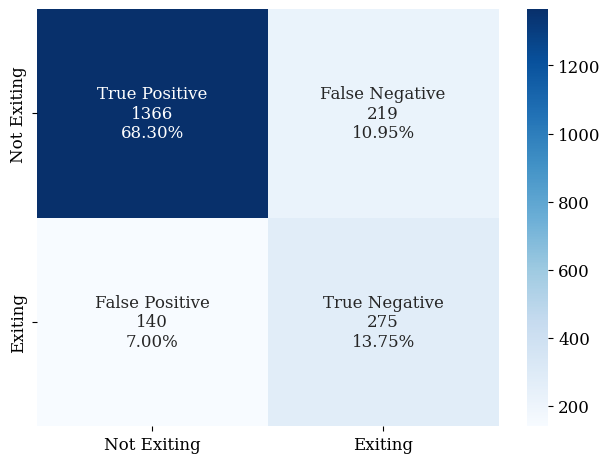

<IPython.core.display.Javascript object>

In [ ]:
model_03_test_otimal_threshold_set = display_optimal_threshold_metrics(model_03_name,model_03)

In [ ]:
model_03_test_otimal_threshold_set

Accuracy Recall Precision    F1     FN
0     0.82   0.76      0.73  0.74  10.95

<IPython.core.display.Javascript object>

**Observations:**
* The Recall 76%, its improved but FN also increased approx 11%

### **Model_04 : Adam Optimizer and Dropout**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_04_name="model_04 : With Dropout : ADAM"

# Initializing the model
model_04 = Sequential()

model_04.add(Dense(32, activation='relu',input_shape=(X_train.shape[1],)))

# Adding dropout of 10%
model_04.add(Dropout(0.1))
model_04.add(Dense(22, activation='relu'))

# Adding dropout of 10%
model_04.add(Dropout(0.1))
model_04.add(Dense(18, activation='relu'))

model_04.add(Dense(9, activation='relu'))

# Adding the output layer with one neuron and Sigmoid as activation
model_04.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
adam = Adam(learning_rate=1e-3)
model_04.compile(loss='binary_crossentropy', optimizer=adam, metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_04.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 22)                726       
                                                                 
 dropout_1 (Dropout)         (None, 22)                0         
                                                                 
 dense_2 (Dense)             (None, 18)                414       
                                                                 
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_04_history = model_04.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_04 : With Dropout : ADAM


-------------------- model_04 : With Dropout : ADAM: Train data -  Train Loss vs Validation Loss --------------------




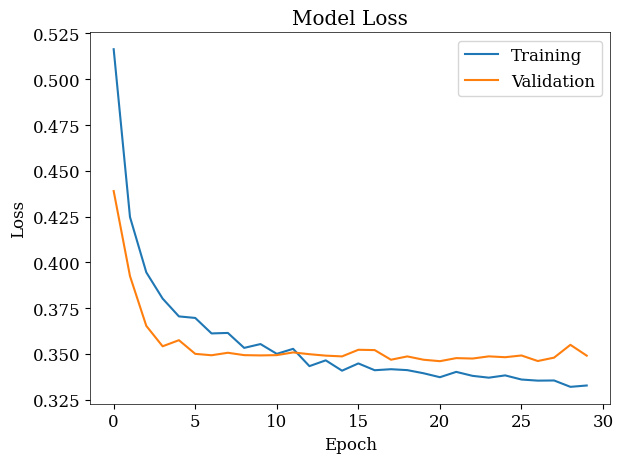



------------------------------ model_04 : With Dropout : ADAM: Model AUC ------------------------------




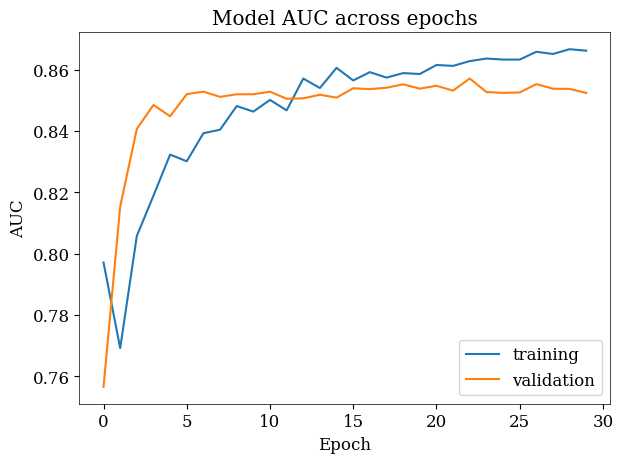



------------------------------ model_04 : With Dropout : ADAM: Train data Classification Report ------------------------------


250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6378
           1       0.79      0.48      0.60      1622

    accuracy                           0.87      8000
   macro avg       0.84      0.72      0.76      8000
weighted avg       0.86      0.87      0.86      8000



------------------------------ model_04 : With Dropout : ADAM: Train data Confusion Matrix ------------------------------




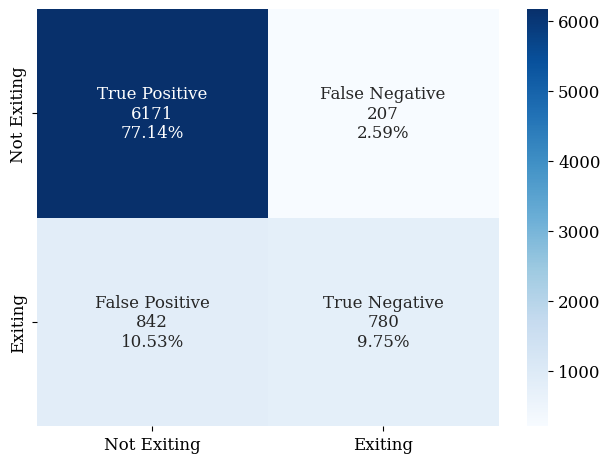

<IPython.core.display.Javascript object>

In [ ]:
model_04_train_set = display_train_metrics(model_04_name,model_04,model_04_history)

In [ ]:
model_04_train_set

Accuracy Recall Precision    F1    FN
0     0.87   0.72      0.84  0.76  2.59

<IPython.core.display.Javascript object>

**Observations:**
* It is observed that the slight difference in error between validation and train set
* It is observed noise as well but model is not overfitting on training set

##### **Testing**



Model: model_04 : With Dropout : ADAM


63/63 [==============================] - 0s 1ms/step
------------------------------ model_04 : With Dropout : ADAM: Test data ROC Curve ------------------------------




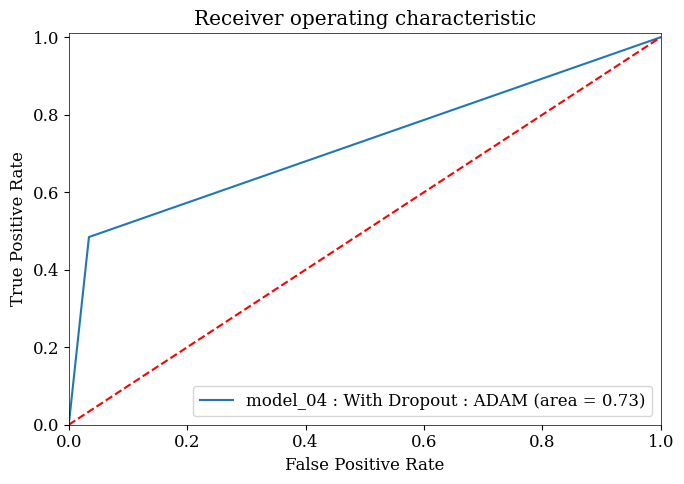

------------------------------ model_04 : With Dropout : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.79      0.48      0.60       415

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



------------------------------ model_04 : With Dropout : ADAM: Test data Confusion Matrix ------------------------------




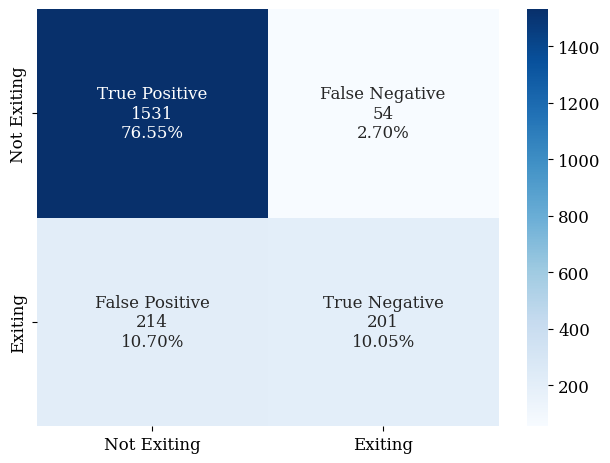

<IPython.core.display.Javascript object>

In [ ]:
model_04_test_set = display_test_metrics(model_04_name,model_04)

In [ ]:
model_04_test_set

Accuracy Recall Precision    F1   FN
0     0.87   0.73      0.83  0.76  2.7

<IPython.core.display.Javascript object>

**Observations:**
* The Recall is 73% and FN is almost 3%, but still looks good. Model has correctly predicated TP approx 77%

##### **Optimal threshold**



Model: model_04 : With Dropout : ADAM : Optimal threshold metrics


63/63 [==============================] - 0s 1ms/step


Optimal threshold auc_roc: 0.17236438


------------------------------ model_04 : With Dropout : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1585
           1       0.49      0.79      0.61       415

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.84      0.79      0.80      2000



------------------------------ model_04 : With Dropout : ADAM: Test data Confusion Matrix ------------------------------




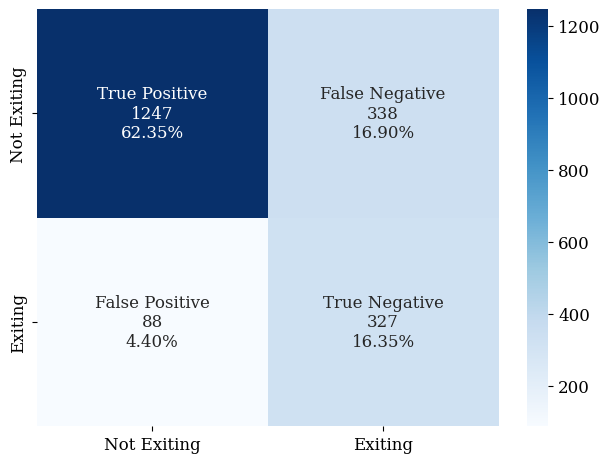

<IPython.core.display.Javascript object>

In [ ]:
model_04_test_otimal_threshold_set = display_optimal_threshold_metrics(model_04_name,model_04)

In [ ]:
model_04_test_otimal_threshold_set

Accuracy Recall Precision    F1    FN
0     0.79   0.79      0.71  0.73  16.9

<IPython.core.display.Javascript object>

**Observations:**
* The Recall is 78% but FN is approx 17%

### **Model_05 : Balanced Data (by applying SMOTE) and SGD Optimizer**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_05_name="model_05 : SMOTE : SGD"

# Initializing the model
model_05 = Sequential()

model_05.add(Dense(32, activation='relu',input_shape=(X_train_over.shape[1],)))
model_05.add(Dense(22, activation='relu'))
model_05.add(Dense(12, activation='relu'))

# Adding the output layer with one neuron and Sigmoid as activation
model_05.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
model_05.compile(loss='binary_crossentropy', optimizer='SGD', metrics=metric)


<IPython.core.display.Javascript object>

In [ ]:
model_05.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 22)                726       
                                                                 
 dense_2 (Dense)             (None, 12)                276       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1431 (5.59 KB)
Trainable params: 1431 (5.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_05_history = model_05.fit(X_train_over, y_train_over, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_05 : SMOTE : SGD


-------------------- model_05 : SMOTE : SGD: Train data -  Train Loss vs Validation Loss --------------------




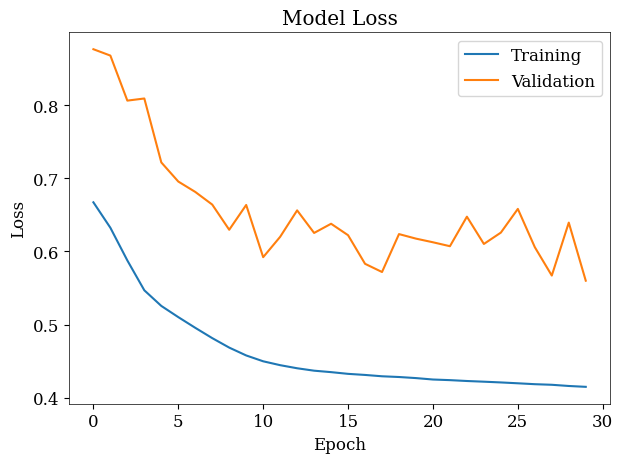



------------------------------ model_05 : SMOTE : SGD: Train data Classification Report ------------------------------


399/399 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      6378
           1       0.84      0.72      0.78      6378

    accuracy                           0.79     12756
   macro avg       0.80      0.79      0.79     12756
weighted avg       0.80      0.79      0.79     12756



------------------------------ model_05 : SMOTE : SGD: Train data Confusion Matrix ------------------------------




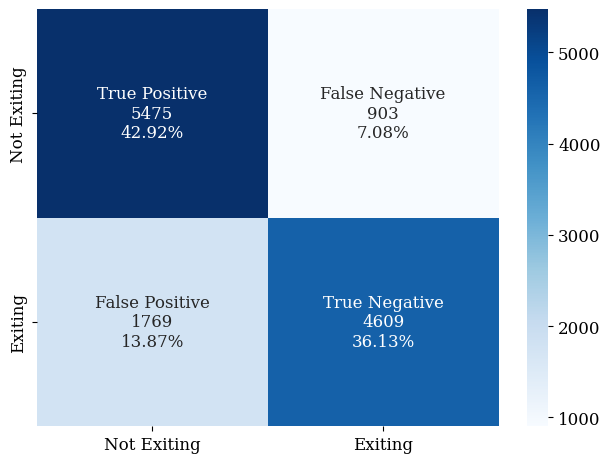

<IPython.core.display.Javascript object>

In [ ]:
model_05_train_set = display_train_metrics(model_05_name,model_05,model_05_history,display_acu=False,X_train_data=X_train_over, y_train_data=y_train_over)

In [ ]:
model_05_train_set

Accuracy Recall Precision    F1    FN
0     0.79   0.79      0.80  0.79  7.08

<IPython.core.display.Javascript object>

##### **Testing**



Model: model_05 : SMOTE : SGD


63/63 [==============================] - 0s 1ms/step
------------------------------ model_05 : SMOTE : SGD: Test data ROC Curve ------------------------------




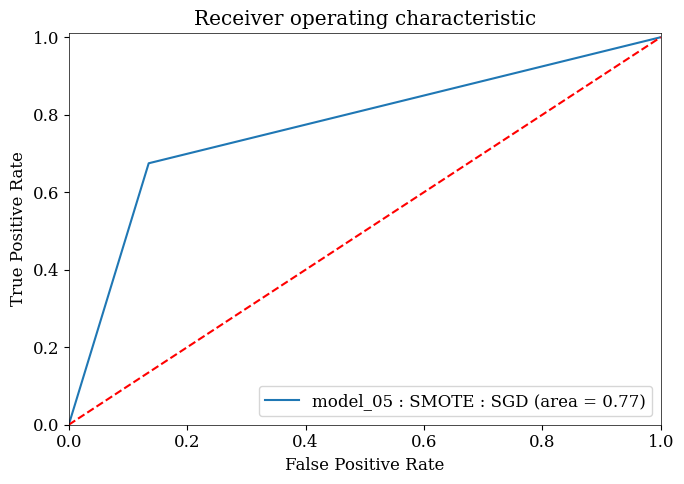

------------------------------ model_05 : SMOTE : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1585
           1       0.57      0.67      0.62       415

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



------------------------------ model_05 : SMOTE : SGD: Test data Confusion Matrix ------------------------------




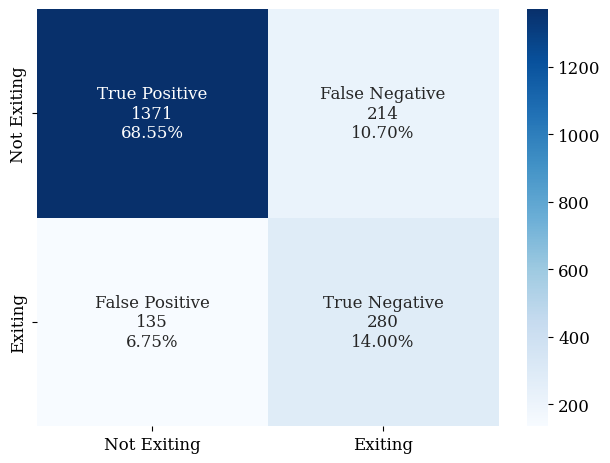

<IPython.core.display.Javascript object>

In [ ]:
model_05_test_set = display_test_metrics(model_05_name,model_05)

In [ ]:
model_05_test_set

Accuracy Recall Precision    F1    FN
0     0.83   0.77      0.74  0.75  10.7

<IPython.core.display.Javascript object>

**Observations:**
* It is observed that the difference in error between validation and train set
and noise in validation
* Model is overfit on training set
* The Recall on Test set 77% but FN is approx 11%

##### **Optimal threshold**



Model: model_05 : SMOTE : SGD : Optimal threshold metrics


63/63 [==============================] - 0s 1ms/step


Optimal threshold auc_roc: 0.38669595


------------------------------ model_05 : SMOTE : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1585
           1       0.48      0.76      0.59       415

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



------------------------------ model_05 : SMOTE : SGD: Test data Confusion Matrix ------------------------------




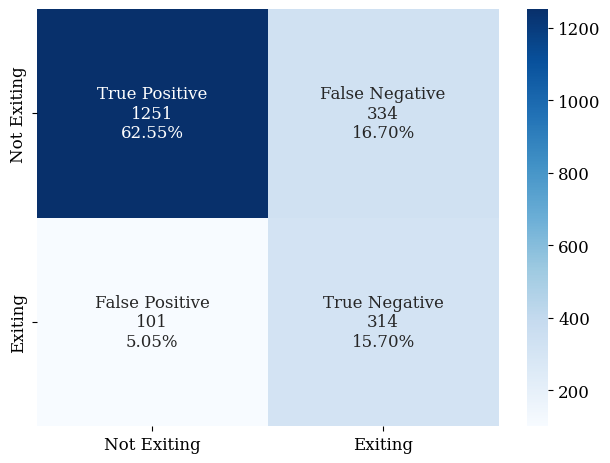

<IPython.core.display.Javascript object>

In [ ]:
model_05_test_otimal_threshold_set = display_optimal_threshold_metrics(model_05_name,model_05)

In [ ]:
model_05_test_otimal_threshold_set

Accuracy Recall Precision    F1    FN
0     0.78   0.77      0.70  0.72  16.7

<IPython.core.display.Javascript object>

**Observations:**
* The recall is 77% and FN is almost 17%

### **Model_06 : Balanced Data (by applying SMOTE) and Adam Optimizer**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_06_name="model_06 : SMOTE : ADAM"

# Initializing the model
model_06 = Sequential()

model_06.add(Dense(22, activation='relu',input_shape=(X_train_over.shape[1],)))
model_06.add(Dense(18, activation='relu'))
model_06.add(Dense(9, activation='relu'))
# Adding the output layer with one neuron and Sigmoid as activation
model_06.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
adam = Adam(learning_rate=1e-3)
model_06.compile(loss='binary_crossentropy', optimizer=adam, metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_06.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                286       
                                                                 
 dense_1 (Dense)             (None, 18)                414       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 881 (3.44 KB)
Trainable params: 881 (3.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_06_history = model_06.fit(X_train_over, y_train_over, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_06 : SMOTE : ADAM


-------------------- model_06 : SMOTE : ADAM: Train data -  Train Loss vs Validation Loss --------------------




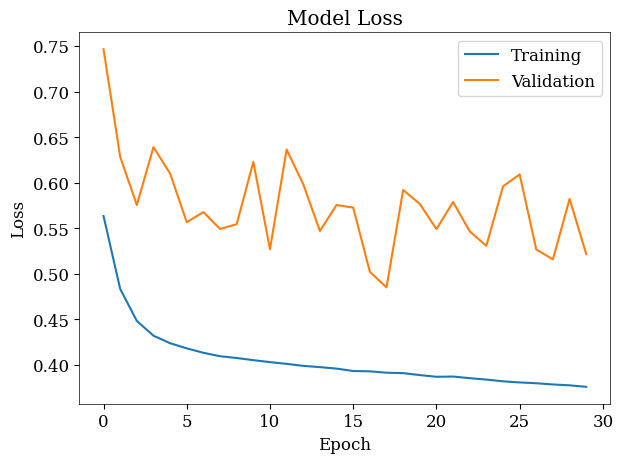



------------------------------ model_06 : SMOTE : ADAM: Train data Classification Report ------------------------------


399/399 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      6378
           1       0.87      0.75      0.80      6378

    accuracy                           0.82     12756
   macro avg       0.82      0.82      0.81     12756
weighted avg       0.82      0.82      0.81     12756



------------------------------ model_06 : SMOTE : ADAM: Train data Confusion Matrix ------------------------------




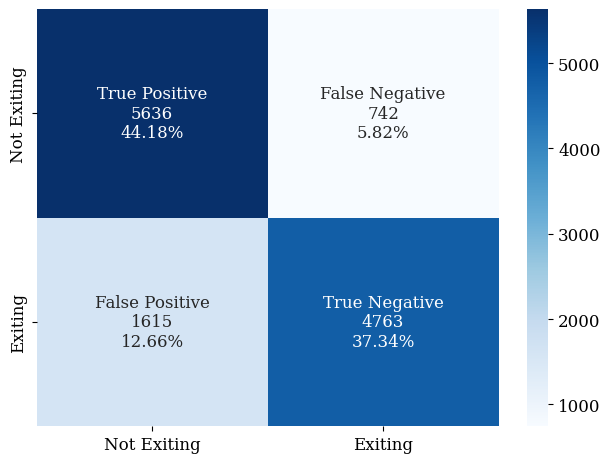

<IPython.core.display.Javascript object>

In [ ]:
model_06_train_set = display_train_metrics(model_06_name,model_06,model_06_history,display_acu=False,X_train_data=X_train_over, y_train_data=y_train_over)

In [ ]:
model_06_train_set

Accuracy Recall Precision    F1    FN
0     0.82   0.82      0.82  0.81  5.82

<IPython.core.display.Javascript object>

##### **Testing**



Model: model_06 : SMOTE : ADAM


63/63 [==============================] - 0s 1ms/step
------------------------------ model_06 : SMOTE : ADAM: Test data ROC Curve ------------------------------




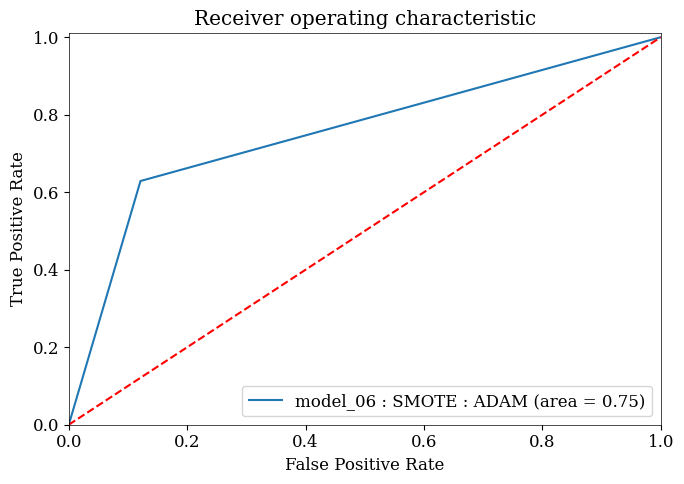

------------------------------ model_06 : SMOTE : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1585
           1       0.58      0.63      0.60       415

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.83      0.83      0.83      2000



------------------------------ model_06 : SMOTE : ADAM: Test data Confusion Matrix ------------------------------




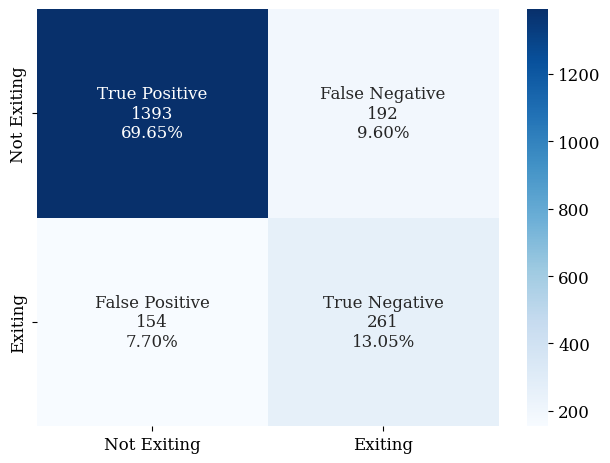

<IPython.core.display.Javascript object>

In [ ]:
model_06_test_set = display_test_metrics(model_06_name,model_06)

In [ ]:
model_06_test_set

Accuracy Recall Precision    F1   FN
0     0.83   0.75      0.74  0.75  9.6

<IPython.core.display.Javascript object>

**Observations:**

* It is observed that the difference in error between validation and train set
and noise in validation
* Model is overfitting on training set
* The Recall on Test set 75% but FN is approx 10%

##### **Optimal threshold**



Model: model_06 : SMOTE : ADAM : Optimal threshold metrics


63/63 [==============================] - 0s 2ms/step


Optimal threshold auc_roc: 0.35029054


------------------------------ model_06 : SMOTE : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1585
           1       0.48      0.74      0.58       415

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.79      2000



------------------------------ model_06 : SMOTE : ADAM: Test data Confusion Matrix ------------------------------




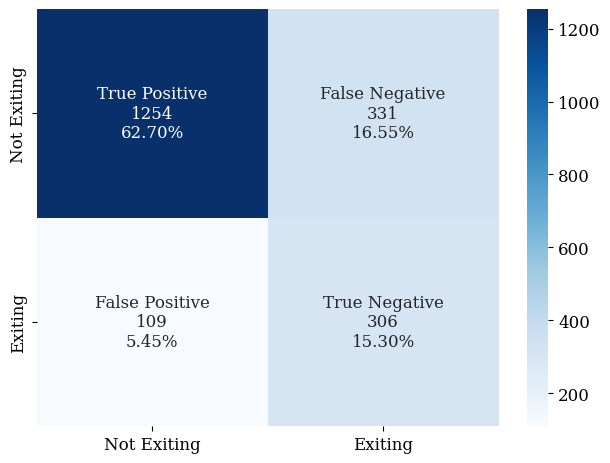

<IPython.core.display.Javascript object>

In [ ]:
model_06_test_otimal_threshold_set = display_optimal_threshold_metrics(model_06_name,model_06)

In [ ]:
model_06_test_otimal_threshold_set

Accuracy Recall Precision    F1     FN
0     0.78   0.76      0.70  0.72  16.55

<IPython.core.display.Javascript object>

**Observations:**
* The Recall is 76% and FN is 17%

### **Model_07 : Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_07_name="model_07 : SMOTE - Dropout : ADAM"

# Initializing the model
model_07 = Sequential()

model_07.add(Dense(22, activation='relu',input_shape=(X_train_over.shape[1],)))
model_07.add(Dense(18, activation='relu'))
model_07.add(Dropout(0.1))
model_07.add(Dense(9, activation='relu'))
model_07.add(Dropout(0.1))
model_07.add(Dense(3, activation='relu'))
# Adding the output layer with one neuron and Sigmoid as activation
model_07.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
adam = Adam(learning_rate=1e-3)
model_07.compile(loss='binary_crossentropy', optimizer=adam, metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_07.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                286       
                                                                 
 dense_1 (Dense)             (None, 18)                414       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 4

<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_07_history = model_07.fit(X_train_over, y_train_over, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_07 : SMOTE - Dropout : ADAM


-------------------- model_07 : SMOTE - Dropout : ADAM: Train data -  Train Loss vs Validation Loss --------------------




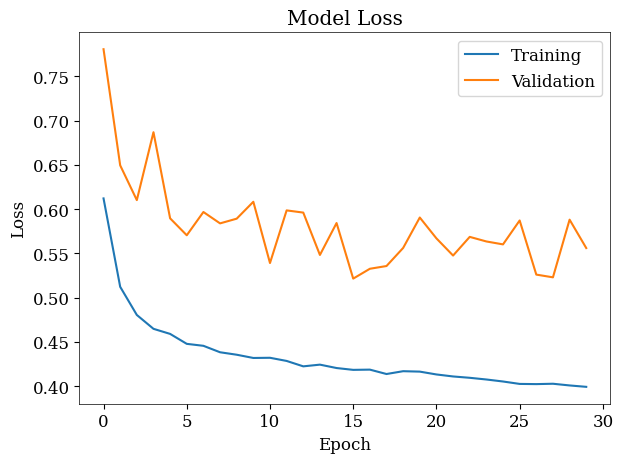



------------------------------ model_07 : SMOTE - Dropout : ADAM: Train data Classification Report ------------------------------


399/399 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      6378
           1       0.87      0.72      0.79      6378

    accuracy                           0.81     12756
   macro avg       0.82      0.81      0.81     12756
weighted avg       0.82      0.81      0.81     12756



------------------------------ model_07 : SMOTE - Dropout : ADAM: Train data Confusion Matrix ------------------------------




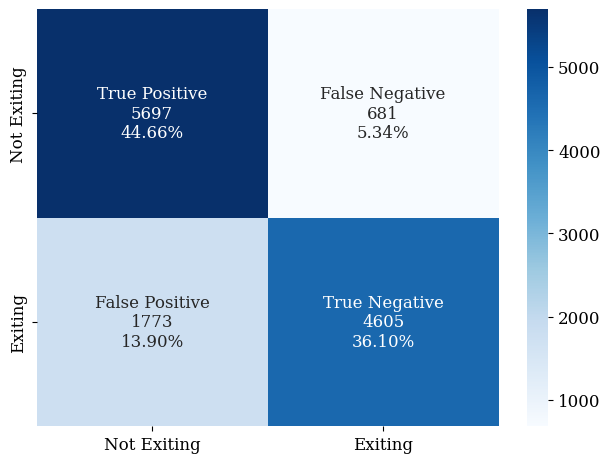

<IPython.core.display.Javascript object>

In [ ]:
model_07_train_set = display_train_metrics(model_07_name,model_07,model_07_history,display_acu=False,X_train_data=X_train_over, y_train_data=y_train_over)

In [ ]:
model_07_train_set

Accuracy Recall Precision    F1    FN
0     0.81   0.81      0.82  0.81  5.34

<IPython.core.display.Javascript object>

##### **Testing**



Model: model_07 : SMOTE - Dropout : ADAM


63/63 [==============================] - 0s 2ms/step
------------------------------ model_07 : SMOTE - Dropout : ADAM: Test data ROC Curve ------------------------------




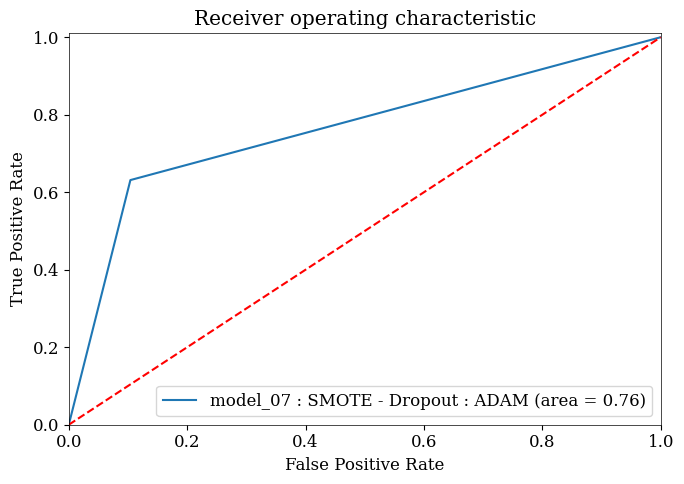

------------------------------ model_07 : SMOTE - Dropout : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1585
           1       0.61      0.63      0.62       415

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



------------------------------ model_07 : SMOTE - Dropout : ADAM: Test data Confusion Matrix ------------------------------




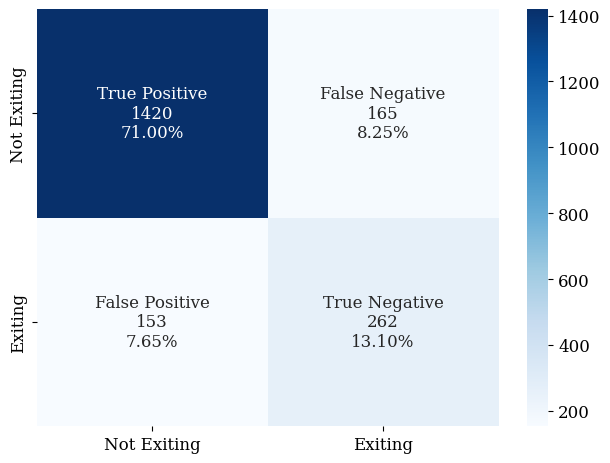

<IPython.core.display.Javascript object>

In [ ]:
model_07_test_set = display_test_metrics(model_07_name,model_07)

In [ ]:
model_07_test_set

Accuracy Recall Precision    F1    FN
0     0.84   0.76      0.76  0.76  8.25

<IPython.core.display.Javascript object>

**Observations:**

* It is observed that the difference in error between validation and train set
and noise in validation
* Model is overfitting on training set
* The Recall on Test set 76% but FN is 8%

##### **Optimal threshold**



Model: model_07 : SMOTE - Dropout : ADAM : Optimal threshold metrics


63/63 [==============================] - 0s 1ms/step


Optimal threshold auc_roc: 0.36336863


------------------------------ model_07 : SMOTE - Dropout : ADAM: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1585
           1       0.50      0.73      0.59       415

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.79      0.81      2000



------------------------------ model_07 : SMOTE - Dropout : ADAM: Test data Confusion Matrix ------------------------------




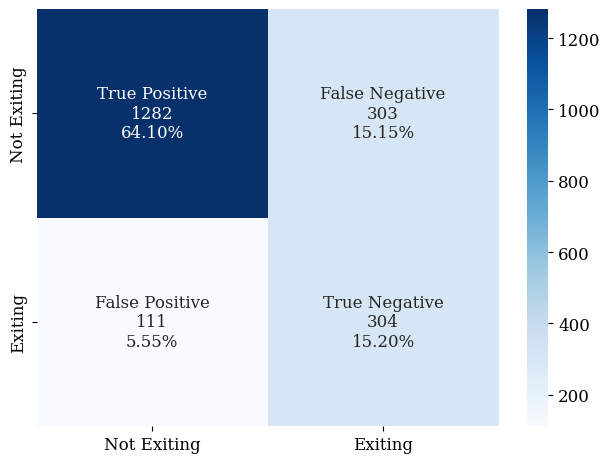

<IPython.core.display.Javascript object>

In [ ]:
model_07_test_otimal_threshold_set = display_optimal_threshold_metrics(model_07_name,model_07)

In [ ]:
model_07_test_otimal_threshold_set

Accuracy Recall Precision    F1     FN
0     0.79   0.77      0.71  0.73  15.15

<IPython.core.display.Javascript object>

**Observations:**
* The Recall is 77% and FN is 15%

### **Model_08 : Balanced Data (by applying SMOTE), SGD Optimizer, and Dropout**

In [ ]:
backend.clear_session()
#set the seed for random number generators
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [ ]:
model_08_name="model_08 : SMOTE - Dropout : SGD"

# Initializing the model
model_08 = Sequential()

model_08.add(Dense(22, activation='relu',input_shape=(X_train_over.shape[1],)))
model_08.add(Dense(18, activation='relu'))
model_08.add(Dropout(0.1))
model_08.add(Dense(9, activation='relu'))
model_08.add(Dropout(0.1))
model_08.add(Dense(3, activation='relu'))
# Adding the output layer with one neuron and Sigmoid as activation
model_08.add(Dense(1, activation='sigmoid'))

<IPython.core.display.Javascript object>

In [ ]:
#set the optimizer, loss function, and metric
model_08.compile(loss='binary_crossentropy', optimizer='SGD', metrics=metric)

<IPython.core.display.Javascript object>

In [ ]:
model_08.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                286       
                                                                 
 dense_1 (Dense)             (None, 18)                414       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 4

<IPython.core.display.Javascript object>

##### **Training**

In [ ]:
#train model across select number of epochs
epochs=30

model_08_history = model_08.fit(X_train_over, y_train_over, validation_split=0.2, epochs=epochs, verbose=0)

<IPython.core.display.Javascript object>



Model: model_08 : SMOTE - Dropout : SGD


-------------------- model_08 : SMOTE - Dropout : SGD: Train data -  Train Loss vs Validation Loss --------------------




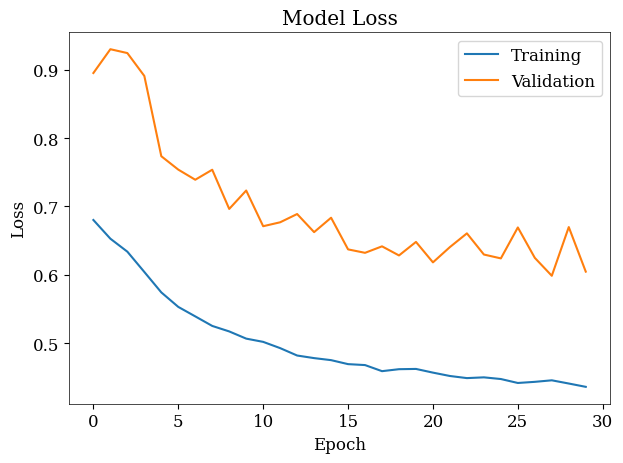



------------------------------ model_08 : SMOTE - Dropout : SGD: Train data Classification Report ------------------------------


399/399 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6378
           1       0.85      0.69      0.76      6378

    accuracy                           0.78     12756
   macro avg       0.79      0.78      0.78     12756
weighted avg       0.79      0.78      0.78     12756



------------------------------ model_08 : SMOTE - Dropout : SGD: Train data Confusion Matrix ------------------------------




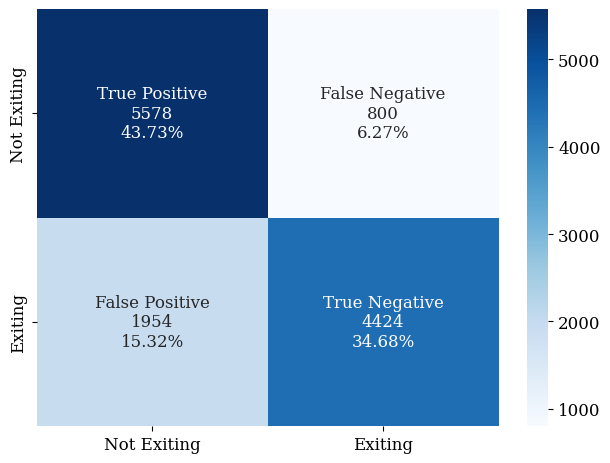

<IPython.core.display.Javascript object>

In [ ]:
model_08_train_set = display_train_metrics(model_08_name,model_08,model_08_history,display_acu=False,X_train_data=X_train_over, y_train_data=y_train_over)

In [ ]:
model_08_train_set

Accuracy Recall Precision    F1    FN
0     0.78   0.78      0.79  0.78  6.27

<IPython.core.display.Javascript object>

##### **Testing**



Model: model_08 : SMOTE - Dropout : SGD


63/63 [==============================] - 0s 3ms/step
------------------------------ model_08 : SMOTE - Dropout : SGD: Test data ROC Curve ------------------------------




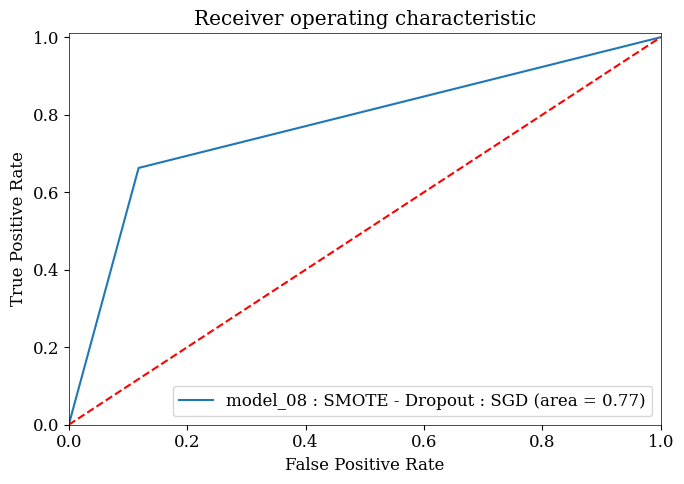

------------------------------ model_08 : SMOTE - Dropout : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1585
           1       0.60      0.66      0.63       415

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



------------------------------ model_08 : SMOTE - Dropout : SGD: Test data Confusion Matrix ------------------------------




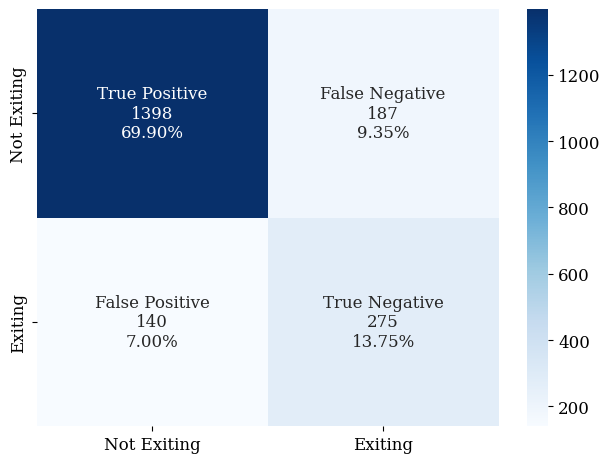

<IPython.core.display.Javascript object>

In [ ]:
model_08_test_set = display_test_metrics(model_08_name,model_08)

In [ ]:
model_08_test_set

Accuracy Recall Precision    F1    FN
0     0.84   0.77      0.75  0.76  9.35

<IPython.core.display.Javascript object>

**Observations:**

* It is observed that the difference in error between validation and train set
and noise in validation
* Model is overfitting on training set
* The Recall on Test set 77% but FN is 9%

##### **Optimal threshold**



Model: model_08 : SMOTE - Dropout : SGD : Optimal threshold metrics


63/63 [==============================] - 0s 2ms/step


Optimal threshold auc_roc: 0.33109474


------------------------------ model_08 : SMOTE - Dropout : SGD: Test data Classification Report ------------------------------


              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1585
           1       0.47      0.78      0.59       415

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.79      2000



------------------------------ model_08 : SMOTE - Dropout : SGD: Test data Confusion Matrix ------------------------------




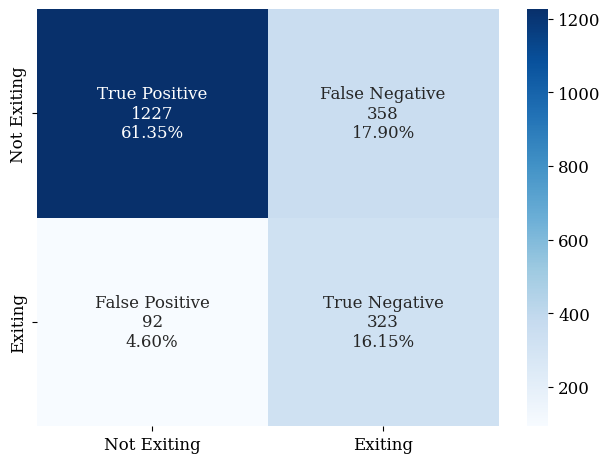

<IPython.core.display.Javascript object>

In [ ]:
model_08_test_otimal_threshold_set = display_optimal_threshold_metrics(model_08_name,model_08)

In [ ]:
model_08_test_otimal_threshold_set

Accuracy Recall Precision    F1    FN
0     0.78   0.78      0.70  0.72  17.9

<IPython.core.display.Javascript object>

## Model Performance Comparison and Final Model Selection

### **Model Performance Comparison**

In [ ]:
display_model_performance()



Training performance VS Test performance comparison:




Accuracy Recall Precision    F1    FN  \
Model_01 : SGD                    0.86   0.70      0.83  0.73  2.39   
Model_02 : Adam                   0.87   0.71      0.83  0.75  2.51   
Model_03 : Adam                   0.88   0.74      0.87  0.78  1.76   
Model_04 : Adam-Dropout           0.87   0.72      0.84  0.76  2.59   
Model_05 : SMOTE-SGD              0.79   0.79      0.80  0.79  7.08   
Model_06 : SMOTE-Adam             0.82   0.82      0.82  0.81  5.82   
Model_07 : SMOTE-Adam-Dropout     0.81   0.81      0.82  0.81  5.34   
Model_08 : SMOTE-SGD-Dropout      0.78   0.78      0.79  0.78  6.27   

                              <= Training | Test => Accuracy Recall Precision  \
Model_01 : SGD                                          0.86   0.71      0.85   
Model_02 : Adam                                         0.87   0.72      0.84   
Model_03 : Adam                                         0.86   0.70      0.83   
Model_04 : Adam-Dropout                                 0.87   0.73      0.83   
Model_05 : SMOTE-SGD                                    0.83   0.77      0.74   
Model_06 : SMOTE-Adam                                   0.83   0.75      0.74   
Model_07 : SMOTE-Adam-Dropout                           0.84   0.76      0.76   
Model_08 : SMOTE-SGD-Dropout                            0.84   0.77      0.75   

                                 F1     FN  
Model_01 : SGD                 0.75   1.75  
Model_02 : Adam                0.76   2.40  
Model_03 : Adam                0.73   2.45  
Model_04 : Adam-Dropout        0.76   2.70  
Model_05 : SMOTE-SGD           0.75  10.70  
Model_06 : SMOTE-Adam          0.75   9.60  
Model_07 : SMOTE-Adam-Dropout  0.76   8.25  
Model_08 : SMOTE-SGD-Dropout   0.76   9.35

<IPython.core.display.Javascript object>

### **Final Model Selection**
After thorough evaluation and analysis, **Model_01 : SGD** has demonstrated strong performance across key metrics, making it a suitable choice for our application.

Here are the performance metrics for **Model_01 : SGD**:
  * Accuracy: 86%
  * Precision: 85%
  * Recall: 71%
  * F1-score: 75%
  * False Negative Rate (FN): 1.75%

The above metrics indicate that **Model_01 : SGD** achieves high accuracy and precision while maintaining a good balance between recall and F1-score.   
Notably, the false negative rate is impressively low at 1.75%, indicating the model's effectiveness in minimizing missed positive instances.

Given these performance metrics, **Model_01 : SGD** shows promising results and aligns well with our objectives. \
Its robust performance suggests that it can effectively classify instances and minimize the risk of false negatives, which is crucial for the Bank.

Based on these compelling results and the absence of overfitting, I believe that **Model_01 : SGD** is well-suited to meet our objectives.

## Actionable Insights and Business Recommendations

### **Actionable Insights**

1. **Model Performance Validation:**

  * Despite the challenges posed by imbalanced target classes and poor predictors, the final neural network model has been selected based on its ability to effectively predict bank customer attrition.
  * Before deployment, conduct thorough validation of the model's performance on unseen data to ensure that it maintains its predictive power and generalizes well to new observations.

2. **Feature Importance Analysis:**
  * Although the majority of features are deemed poor predictors individually, it's essential to conduct post-modeling feature importance analysis to understand their collective contribution to the predictive power of the model.
  * Identify any unexpected patterns or interactions among features that may have been overlooked during the initial analysis and leverage these insights to refine future modeling approaches.

3. **Data Enrichment and Feature Engineering:**

  * Continuously enrich the feature set with new variables and data sources to enhance the model's predictive performance.
  * Explore alternative data sources such as customer interactions, transactional data, and demographic information to derive new features that may better capture the underlying drivers of customer attrition.

4. **Collaboration with Domain Experts:**
  * Foster collaboration between data scientists and domain experts to leverage domain knowledge and insights in model interpretation and refinement.
  * Engage with subject matter experts to validate model outputs, identify potential biases, and incorporate domain-specific considerations into the modeling process.

By implementing these actionable insights, we can maximize the effectiveness of the selected neural network model for predicting bank customer attrition, despite the inherent challenges posed by imbalanced target classes and poor predictors.



### **Business Recommendations**
1. **Customer Segmentation and Targeted Marketing:**

  * Utilize predictive analytics to segment customers based on their likelihood of attrition.
  * Tailor marketing campaigns and promotions to target high-risk customer segments with personalized offers and incentives aimed at retaining their business.

2. **Proactive Customer Retention Strategies:**
  * Implement proactive measures to identify and address potential churn drivers before customers decide to leave.
  * Develop proactive retention campaigns that offer incentives, discounts, or personalized services to customers showing early signs of attrition.
  * Utilize data-driven insights to anticipate customer needs and provide proactive solutions to address their concerns.

3. **Enhanced Customer Experience:**
  * Focus on delivering exceptional customer experiences across all touchpoints, including in-branch, online, and mobile channels.
  * Gather customer feedback and sentiment analysis to identify pain points and areas for improvement, then prioritize initiatives that address these issues.

4. **Product and Service Innovation:**
  * Innovate new products and services that meet the evolving needs and preferences of customers, helping to differentiate the bank in the market.
  * Leverage predictive analytics to identify gaps in the current product portfolio and opportunities for innovation, such as personalized financial solutions or value-added services.
  * Continuously monitor market trends and competitor offerings to stay ahead of customer demands and maintain a competitive edge.



<font size=6 color='blue'>Power Ahead</font>
___